# Machine Learning Terapan - Proyek Pertama [Predictive Analytics]

> Dataset : 📚 Students Performance Dataset 📚

- **Name      :** Ahmad Zaky Humami
- **Student ID :** MC009D5Y0493
- **Class ID  :** MC-40


## Domain Proyek

> Prestasi akademik siswa menjadi indikator penting bagi sekolah, orang tua, dan pembuat kebijakan untuk memahami efektivitas proses belajar–mengajar, mengalokasikan sumber daya, serta memberikan intervensi yang tepat waktu. Sejumlah penelitian menunjukkan bahwa faktor–faktor demografis (usia, jenis kelamin), kebiasaan belajar (lama belajar per minggu, kehadiran), serta dukungan sosial (bimbingan belajar, dukungan orang tua, kegiatan ekstrakurikuler) secara signifikan mempengaruhi hasil belajar siswa (Pei, 2023; Li & Wang, 2024). Di Indonesia, riset oleh Ambarita et al. (2024) dan Mentari & Nurhaeka (2024) juga mengonfirmasi peran faktor-faktor tersebut dalam memprediksi nilai akhir siswa SD dan SMA.

Mengapa Masalah Ini Harus Diselesaikan?
  - Deteksi Dini Siswa Berisiko
    > Mengidentifikasi siswa dengan potensi prestasi rendah memungkinkan sekolah melakukan pembinaan lebih awal.
  - Optimalisasi Intervensi
    > Data-driven insights membantu memilih jenis dukungan (bimbingan belajar, konseling orang tua, program ekstrakurikuler) yang paling efektif.
  - Pengambilan Keputusan Berbasis Bukti
    > Otomatisasi prediksi dengan machine learning mempercepat evaluasi kebijakan pendidikan dan alokasi anggaran.


## Business Understanding

1. Bagaimana memprediksi kategori klasifikasi prestasi (GradeClass: A, B, C, D, F) siswa berdasarkan atribut demografis dan perilaku akademik mereka?

2. Faktor manakah (misal GPA, jam belajar mingguan, absensi, dukungan orang tua, partisipasi ekstrakurikuler) yang paling berpengaruh terhadap prediksi GradeClass?

3. Seberapa andal model machine learning (misalnya XGBoost, Random Forest) dalam memprediksi GradeClass—diukur melalui metrik accuracy, F1-score, dan confusion matrix—pada data testing yang terpisah?

## Goal

1. Membangun model klasifikasi yang dapat mencapai ≥ 80 % accuracy pada data testing.
2. Melihat Faktor penting yang mempengaruhi Grade Class
3. Mengukur precision, recall, F1-score per kelas dan menghasilkan confusion matrix.

## Data Understanding

### Import Library

In [452]:
!pip install kaggle

In [453]:
import os
import shutil
import textwrap
import numpy as np
import zipfile
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline

### Load Dataset

In [454]:
#!/bin/bash
!curl -L -o Student_performance_data.zip\
  "https://www.kaggle.com/api/v1/datasets/download/rabieelkharoua/students-performance-dataset"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 67743  100 67743    0     0   216k      0 --:--:-- --:--:-- --:--:--  216k


In [455]:
#membuka zip menjadi folder
with zipfile.ZipFile("/content/Student_performance_data.zip", "r") as zip_ref:
    zip_ref.extractall("Student_performance_data")

#membaca csv dalam folder
data = pd.read_csv("/content/Student_performance_data/Student_performance_data _.csv")

# Display the first few rows
student_df = data

In [456]:
print(student_df.shape)
student_df.head(100)

(2392, 15)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,16,1,2,3,19.278320,29,0,3,0,0,0,1,0.732908,4.0
96,1097,16,1,1,1,12.831594,29,0,4,0,0,1,0,0.965482,4.0
97,1098,18,0,0,2,0.468659,5,0,2,0,1,0,0,2.555233,2.0
98,1099,16,0,0,3,8.603518,25,0,2,1,0,1,1,0.744322,4.0


## Exploratory Data Analysis (EDA)

### Deskripsi Variabel

Variabel | Keterangan
----------|----------
StudentID | A unique identifier assigned to each student (1001 to 3392).
Age | The age of the students ranges from 15 to 18 years.
Gender | Gender of the students, where 0 represents Male and 1 represents Female.
Ethnicity | Ethnic background of the student. 0: Caucasian, 1: African American, 2: Asian, 3: Other.
ParentalEducation | Level of parental support for the student\'s education. 0: None 1: High School, 2: Some College, 3: Bachelor`s, 4: Higher
StudyTimeWeekly | Weekly study time in hours, ranging from 0 to 20.
Absences |  Number of absences during the school year, ranging from 0 to 30.
Tutoring | Tutoring status, where 0 indicates No and 1 indicates Yes.
ParentalSupport | The education level of the parents, coded as follows: 0: None 1: High School, 2: Some College, 3: Bachelor`s, 4: Higher
Extracurricular | Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
Sports | Participation in sports, where 0 indicates No and 1 indicates Yes.
Music	| Participation in music activities, where 0 indicates No and 1 indicates Yes.
Volunteering	| Participation in volunteering, where 0 indicates No and 1 indicates Yes.
GPA	| Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
GradeClass | Classification of students grades based on GPA: 0: 'A' (GPA >= 3.5) 1: 'B' (3.0 <= GPA < 3.5) 2: 'C' (2.5 <= GPA < 3.0) 3: 'D' (2.0 <= GPA < 2.5) 4: 'F' (GPA < 2.0)

In [457]:
print("Dataset Info :\n")
student_df.info()

Dataset Info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [458]:
print("Dataset Descriptive Statistic :\n")
student_df.describe()

Dataset Descriptive Statistic :



,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


🔹 StudentID
  - Jumlah data: 2392
  - Range ID: 1001 - 3392
  - Insight: ID siswa bersifat unik dan berurutan, menunjukkan tidak ada data yang hilang pada kolom ini.

🔹 Age
  - Mean (rata-rata): 16.47 tahun
  - Range usia: 15 - 18 tahun
  - Insight: Dataset mencakup siswa SMA (15–18 tahun), dengan mayoritas berusia sekitar 16 tahun.

🔹 Gender
  - Mean: 0.51 (mewakili distribusi antara 0 dan 1)
  - Insight: Kolom ini kemungkinan binary (0: perempuan, 1: laki-laki), dan distribusinya cukup seimbang (sekitar 50:50).

🔹 Ethnicity
  - Mean: 0.88
  - Range nilai: 0 - 3
  - Insight: Terdapat hingga 4 kategori etnis. Nilai mean rendah (mendekati 1), menunjukkan kelompok etnis dominan adalah yang dikodekan sebagai 0 atau 1.

🔹 ParentalEducation
  - Mean: 1.75 dari maksimal 4
  - Insight: Sebagian besar orang tua siswa memiliki pendidikan antara tingkat menengah hingga tinggi.

🔹 StudyTimeWeekly
  - Mean: 9.77 jam/minggu
  - Range: 0.001 - 19.97 jam
  - Insight: Waktu belajar mingguan sangat bervariasi. Ada siswa yang hampir tidak belajar sama sekali.

🔹 Absences
  - Mean: 14.54 hari
  - Range: 0 - 29 hari
  - Insight: Tingkat ketidakhadiran cukup tinggi secara rata-rata. Perlu perhatian lebih pada faktor ini karena bisa berdampak pada prestasi.

🔹 Tutoring
  - Mean: 0.30
  - Insight: Hanya sekitar 30% siswa yang mengikuti les tambahan.

🔹 ParentalSupport
  - Mean: 2.12
  - Range: 0 - 4
  - Insight: Dukungan orang tua bervariasi dari sangat rendah (0) hingga sangat tinggi (4), dengan rata-rata sekitar 2, menunjukkan dukungan sedang.

🔹 Extracurricular
  - Mean: 0.38
  - Insight: Sekitar 38% siswa terlibat dalam kegiatan ekstrakurikuler.

🔹 Sports
  - Mean: 0.30
  - Insight: Hanya sekitar 30% siswa yang aktif dalam kegiatan olahraga.

🔹 Music
  - Mean: 0.20
  - Insight: Keterlibatan dalam musik lebih rendah (sekitar 20%).

🔹 Volunteering
  - Mean: 0.16
  - Insight: Hanya 16% siswa yang aktif dalam kegiatan relawan, menunjukkan kegiatan sosial masih cukup jarang.

🔹 GPA (Grade Point Average)
  - Mean: 1.91 dari skala 0–4
  - Insight: Rata-rata nilai siswa berada di bawah 2.0, menandakan performa akademik kurang baik secara umum.

🔹 GradeClass
  - Mean: 2.98 (hampir 3)
  - Range: 1 - 4
  - Insight: Skor klasifikasi nilai mayoritas berada pada kelas 3 dan 4, menunjukkan distribusi performa yang cukup tinggi meskipun rata-rata GPA cukup rendah.







#### Menangani Missing Value

In [459]:
# Cek Missing Value
pd.DataFrame({'Missing Value':student_df.isna().sum()})

,Missing Value
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


Untuk Mising Value
- Dari hasil yang ditampilkan, data tidak memiliki nilai kosong (null) pada setiap kolom dataset

#### Memeriksa Duplikasi Data

In [460]:
# Cek Duplikasi Data
print("Jumlah duplikasi: ", student_df.duplicated().sum())

Jumlah duplikasi:  0


Untuk Duplikasi Data
- Hasil yang ditampilkan adalah 0, dengan demikian data tidak ada yang ganda (dupikat)

#### Konversi nilai Numeric pada Column Categorical ke Object

In [461]:
# Menonaktifkan peringatan terkait downcasting
pd.set_option('future.no_silent_downcasting', True)

# Mengganti nilai number kategori ke String Keterangan
def convert_numerical_to_object ():
  student_df['Gender'] = student_df['Gender'].replace({1: 'Wanita', 0: 'Pria'})
  student_df['Extracurricular'] = student_df['Extracurricular'].replace({1:'Yes', 0:'No'})
  student_df['Tutoring'] = student_df['Tutoring'].replace({1: 'Yes', 0: 'No'})
  student_df['Music'] = student_df['Music'].replace({1: 'Yes', 0: 'No'})
  student_df['Sports'] = student_df['Sports'].replace({1: 'Yes', 0: 'No'})
  student_df['Volunteering'] = student_df['Volunteering'].replace({1: 'Yes', 0: 'No'})
  student_df['ParentalSupport'] = student_df['ParentalSupport'].replace({4: 'Very High', 3: 'High', 2: 'Moderate', 1: 'Low', 0: 'None'})
  student_df['GradeClass'] = student_df['GradeClass'].replace({4.0: 'Grade F', 3.0: 'Grade D', 2.0: 'Grade C', 1.0: 'Grade B', 0.0: 'Grade A'})

In [462]:
#Memanggil fungsi konversi numerik ke objek(string)
convert_numerical_to_object()

#menampilkan datasetd dengan fungsi head()
student_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Wanita,0,2,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,Grade C
1,1002,18,Pria,0,1,15.408756,0,No,Low,No,No,No,No,3.042915,Grade B
2,1003,15,Pria,2,3,4.210570,26,No,Moderate,No,No,No,No,0.112602,Grade F
3,1004,17,Wanita,0,3,10.028829,14,No,High,Yes,No,No,No,2.054218,Grade D
4,1005,17,Wanita,0,2,4.672495,17,Yes,High,No,No,No,No,1.288061,Grade F


### Univariate Analysis EDA

#### Membuat Variabel Numerical Column dan Categorical Column

In [463]:
# Menuliskan seluruh nama kolom numerikal
numerical_col = ["Age", "StudyTimeWeekly", "Absences", "GPA"]
# Menuliskan seluruh nama kolom numerikal

categorical_col = [
    "Gender",
    "Ethnicity",
    "ParentalEducation",
    "Extracurricular",
    "Tutoring",
    "Music",
    "Sports",
    "Volunteering",
    "ParentalSupport",
    "GradeClass"
]


#### Melihat nilai pada Categoriacal Column

In [464]:
# Menghitung jumlah nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
unique_count = student_df[categorical_col].nunique()

# Menampilkan nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
unique_value = student_df[categorical_col].apply(lambda x: sorted(x.unique()))

# Menampilkan hasil dalam bentuk DataFrame
pd.DataFrame({"Total Nilai Berbeda": unique_count, "Nilai-Nilai": unique_value})

,Total Nilai Berbeda,Nilai-Nilai
Gender,2,"[Pria, Wanita]"
Ethnicity,4,"[0, 1, 2, 3]"
ParentalEducation,5,"[0, 1, 2, 3, 4]"
Extracurricular,2,"[No, Yes]"
Tutoring,2,"[No, Yes]"
Music,2,"[No, Yes]"
Sports,2,"[No, Yes]"
Volunteering,2,"[No, Yes]"
ParentalSupport,5,"[High, Low, Moderate, None, Very High]"
GradeClass,5,"[Grade A, Grade B, Grade C, Grade D, Grade F]"


Dapat dilihat pada tabel nilai berbeda pada:
1. Kolom Gender Memiliki 2 Nilai berbeda;
2. Kolom Etnicity Memiliki 4 Nilai berbeda;
3. Kolom ParentalEducation Memiliki 5 Nilai berbeda;
4. Kolom Tutoring Memiliki 2 Nilai berbeda;
5. Kolom ParentalSupport Memiliki 5 Nilai berbeda;
6. Kolom Extracurricular Memiliki 2 Nilai berbeda;
7. Kolom Sports Memiliki 2 Nilai berbeda;
8. Kolom Music Memiliki 2 Nilai berbeda;
9. Kolom Volunteering Memiliki 2 Nilai berbeda;
10. Kolom GradeClass(Variabel Target) Memiliki 5 Nilai berbeda;

#### Distribusi Categorical Column menggunakan Bar Plot

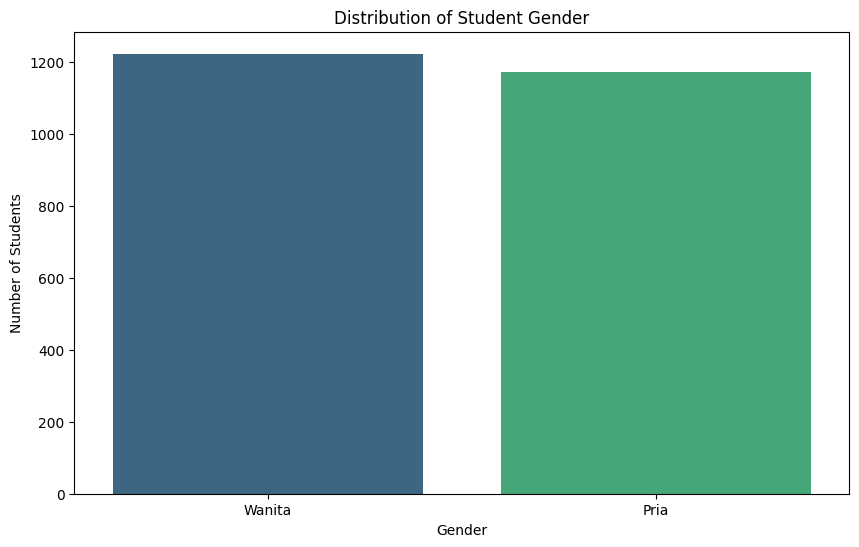

In [465]:
# Membuat Barplot untuk kolom "Gender"
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Gender', data=student_df, palette='viridis', legend=False)
plt.title('Distribution of Student Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

📊 Distribution of Student Gender:

Kategori:
  - Wanita
  - Pria

Insight:
  - Jumlah siswa wanita lebih banyak daripada pria, meskipun tidak terlalu jauh perbedaannya.
  - Ini mengindikasikan distribusi gender cukup seimbang, namun ada sedikit dominan wanita.



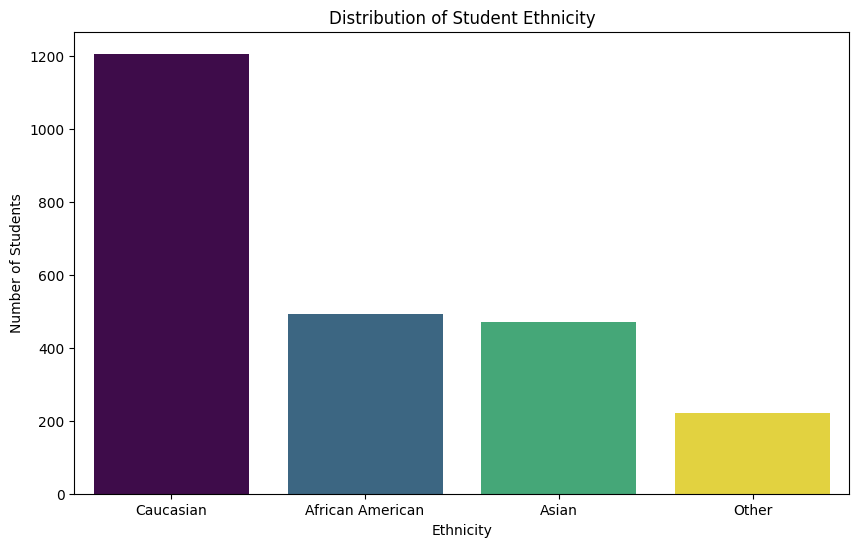

In [466]:
# Membuat Barplot untuk kolom "Ethnicity"
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', hue='Ethnicity', data=student_df, palette='viridis', legend=False)
plt.title('Distribution of Student Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Students')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Caucasian', 'African American', 'Asian', 'Other']) # Assuming the original numerical values are 0, 1, 2, 3 for Ethnicity
plt.show()

📊 Distribution of Student Ethnicity:

Kategori:
  - Caucasian
  - Asian
  - African American
  - Other

Insight:
  - Etnis Caucasian mendominasi populasi siswa dalam dataset.
  - Etnis Asian dan African American jumlahnya hampir sama, tapi jauh di bawah Caucasian.
  - Kategori Other merupakan yang paling sedikit, menunjukkan keberagaman etnis yang relatif kecil.

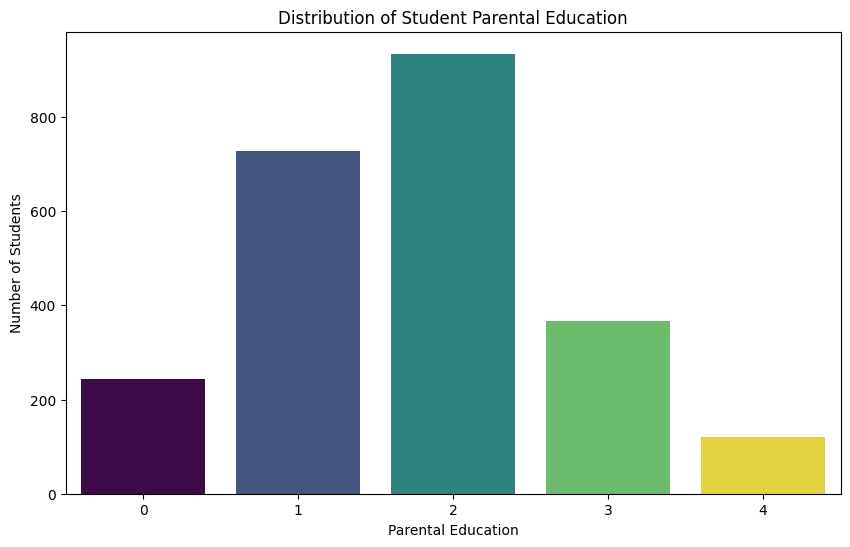

In [467]:
# Membuat Barplot untuk kolom "Parental Education"
plt.figure(figsize=(10, 6))
sns.countplot(x='ParentalEducation', hue='ParentalEducation', data=student_df, palette='viridis', legend=False)
plt.title('Distribution of Student Parental Education')
plt.xlabel('Parental Education')
plt.ylabel('Number of Students')
plt.show()

📊 Distribution of Student Parental Education:

Kategori:
  - 0: None
  - 1: High School
  - 2: Some College
  - 3: Bachelors
  - 4: Higher

Insight:
  - Mayoritas orang tua siswa memiliki latar belakang Some College dan High School.
  - Hanya sebagian kecil yang mencapai tingkat pendidikan Bachelors dan lebih tinggi.
  - Sekitar 250 siswa berasal dari keluarga dengan orang tua tidak memiliki pendidikan formal.
  - Ini bisa berdampak pada pola dukungan dan pemahaman orang tua terhadap pendidikan anak.

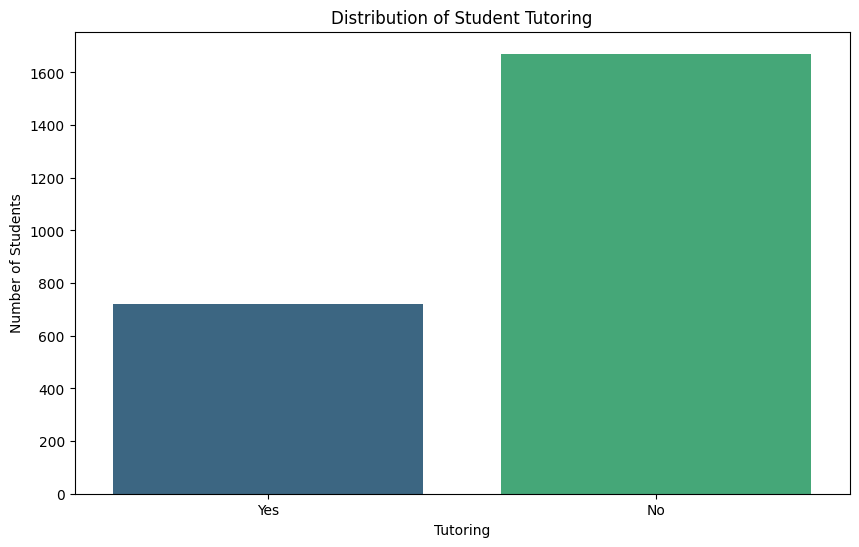

In [468]:
# Membuat Barplot untuk kolom "Tutoring"
plt.figure(figsize=(10, 6))
sns.countplot(x='Tutoring', hue='Tutoring', data=student_df, palette='viridis', legend=False)
plt.title('Distribution of Student Tutoring')
plt.xlabel('Tutoring')
plt.ylabel('Number of Students')
plt.show()

📊 Distribution of Student Tutoring

Kategori:
  - Yes (mengikuti bimbingan belajar)
  - No (tidak mengikuti bimbingan belajar)

Insight:
  - Mayoritas siswa tidak mengikuti bimbingan belajar.
  - Hanya sekitar 30% yang mengikuti program tutoring, selaras dengan statistik deskriptif sebelumnya (mean ≈ 0.3).
  - Hal ini dapat berpengaruh pada variasi prestasi akademik antar siswa.

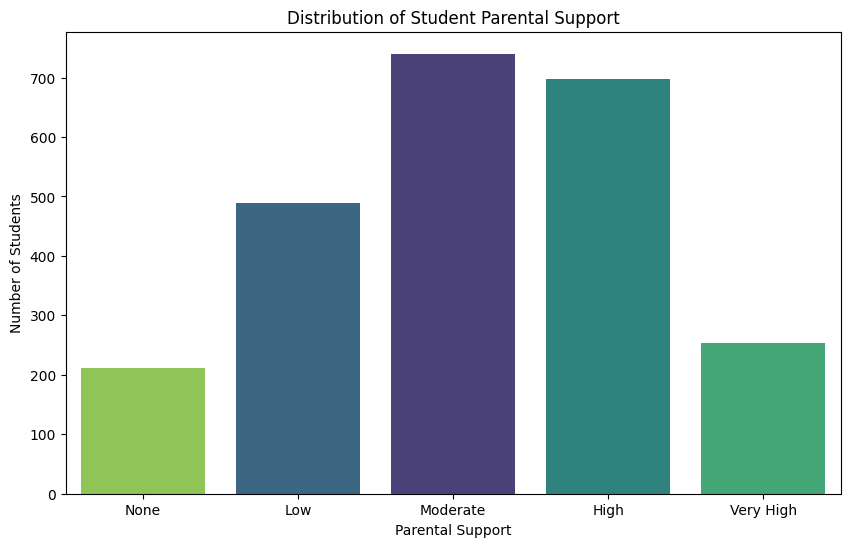

In [469]:
# Membuat Barplot untuk kolom "Parental Support"
plt.figure(figsize=(10, 6))
sns.countplot(x='ParentalSupport', hue='ParentalSupport', data=student_df, palette='viridis', legend=False, order=['None', 'Low', 'Moderate', 'High', 'Very High'])
plt.title('Distribution of Student Parental Support')
plt.xlabel('Parental Support')
plt.ylabel('Number of Students')
plt.show()

📊 Distribution of Student Parental Support:

Kategori:
  - None
  - Low
  - Moderate
  - High
  - Very High

Insight:
  - Sebagian besar orang tua memberikan dukungan sedang (Moderate) dan tinggi (High) terhadap pendidikan anaknya.
  - Dukungan sangat tinggi (Very High) relatif sedikit.
  - Sekitar 200+ siswa tidak mendapatkan dukungan sama sekali dari orang tua, yang bisa menjadi indikator risiko terhadap prestasi akademik mereka.
  - Distribusi dukungan cukup beragam, menunjukkan adanya variasi signifikan dalam latar belakang keluarga siswa.

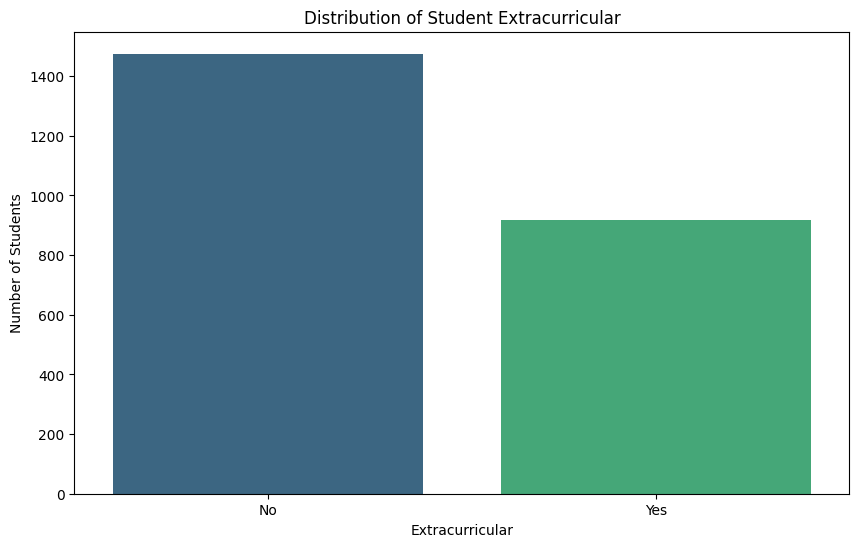

In [470]:
# Membuat Barplot untuk kolom "Extracurricular"
plt.figure(figsize=(10, 6))
sns.countplot(x='Extracurricular', hue='Extracurricular', data=student_df, palette='viridis', legend=False)
plt.title('Distribution of Student Extracurricular')
plt.xlabel('Extracurricular')
plt.ylabel('Number of Students')
plt.show()

📊 Distribution of Student Extracurricular:

Kategori:
  - Yes (ikut)
  - No (tidak ikut)

Insight:
  - Lebih dari 60% siswa tidak ikut ekstrakurikuler, sisanya (~40%) ikut.
  - Ini bisa menunjukkan bahwa ekstrakurikuler belum sepenuhnya dimanfaatkan siswa sebagai sarana pengembangan diri.
  - Perlu digali apakah partisipasi dalam ekstrakurikuler berdampak positif pada GPA atau prestasi lainnya.

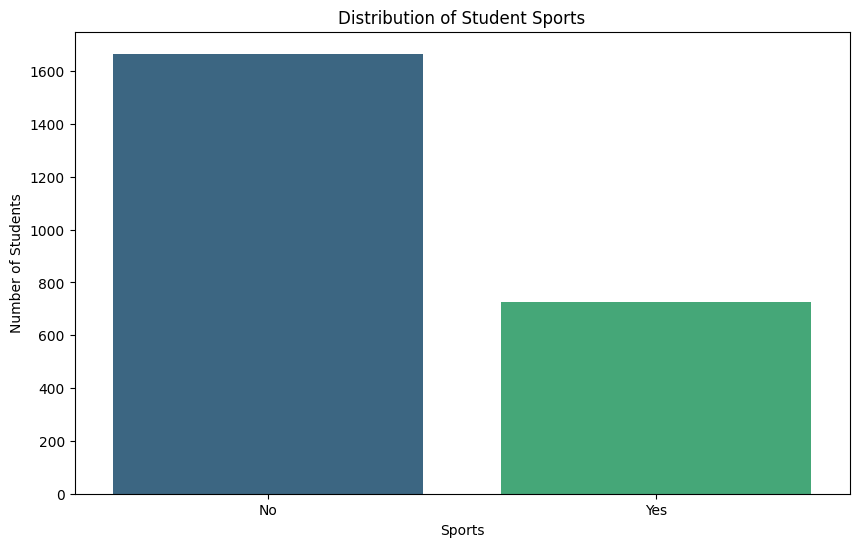

In [471]:
# Membuat Barplot untuk kolom "Sports"
plt.figure(figsize=(10, 6))
sns.countplot(x='Sports', hue='Sports', data=student_df, palette='viridis', legend=False)
plt.title('Distribution of Student Sports')
plt.xlabel('Sports')
plt.ylabel('Number of Students')
plt.show()

📊 Distribution of Student Sports:

Kategori:
  - Yes (ikut kegiatan olahraga)
  - No (tidak ikut)

Insight:
  - Sebagian besar siswa (~70%) tidak terlibat dalam kegiatan olahraga.
  - Hanya sekitar 30% siswa aktif dalam olahraga.
  - Ini bisa berdampak pada keseimbangan fisik-mental siswa, karena olahraga berkontribusi pada kesehatan dan performa akademik.



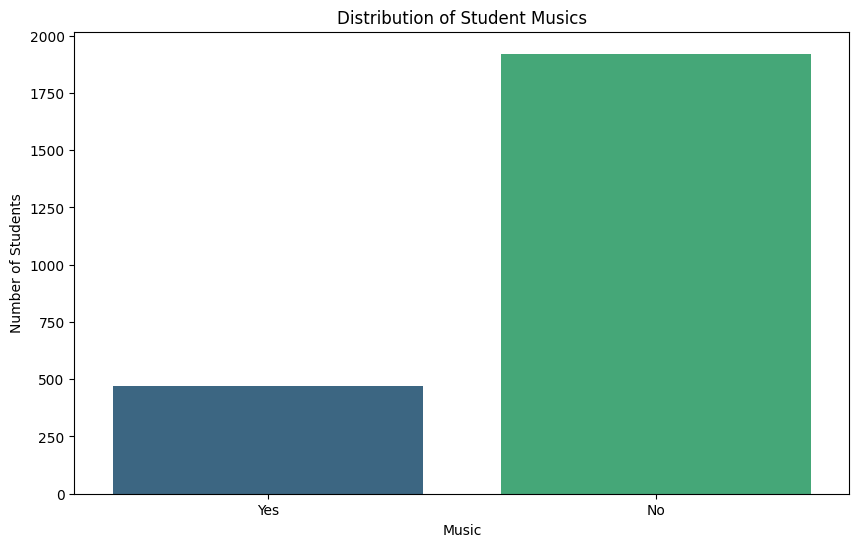

In [472]:
# Membuat Barplot untuk kolom "Musics"
plt.figure(figsize=(10, 6))
sns.countplot(x='Music', hue='Music', data=student_df, palette='viridis', legend=False)
plt.title('Distribution of Student Musics')
plt.xlabel('Music')
plt.ylabel('Number of Students')
plt.show()

📊 Distribution of Student Musics:

Kategori:
  - Yes (ikut musik)
  - No (tidak ikut)

Insight:
  - Hanya sekitar 20% siswa yang ikut kegiatan musik, sedangkan mayoritas (~80%) tidak ikut.
  - Hal ini mencerminkan kurangnya minat atau akses terhadap program musik di sekolah atau dalam lingkungan siswa.
  - Aktivitas musik seringkali berkorelasi dengan keterampilan kognitif dan kreativitas, sehingga bisa menjadi area untuk ditingkatkan.

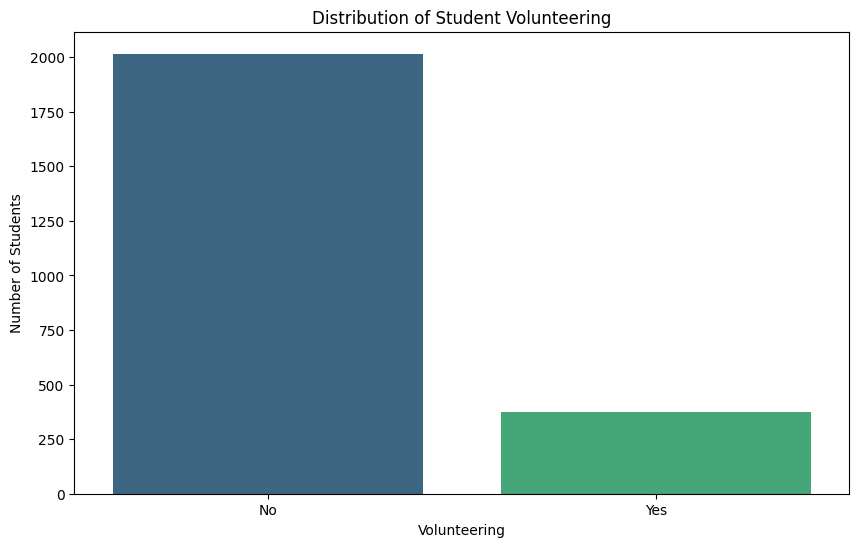

In [473]:
# Membuat Barplot untuk kolom "Volunteering"
plt.figure(figsize=(10, 6))
sns.countplot(x='Volunteering', hue='Volunteering', data=student_df, palette='viridis', legend=False)
plt.title('Distribution of Student Volunteering')
plt.xlabel('Volunteering')
plt.ylabel('Number of Students')
plt.show()

📊 Distribution of Student Volunteering:

Kategori:
  - Yes (pernah menjadi relawan)
  - No (tidak pernah)

Insight:
  - Sebagian besar siswa (lebih dari 80%) tidak pernah terlibat dalam kegiatan sosial atau volunteering.
  - Ini menunjukkan bahwa keterlibatan siswa dalam kegiatan sosial masih rendah, meskipun kegiatan ini penting untuk membentuk karakter dan soft skill.
  - Program sekolah bisa lebih mendorong siswa untuk ikut serta dalam volunteering.

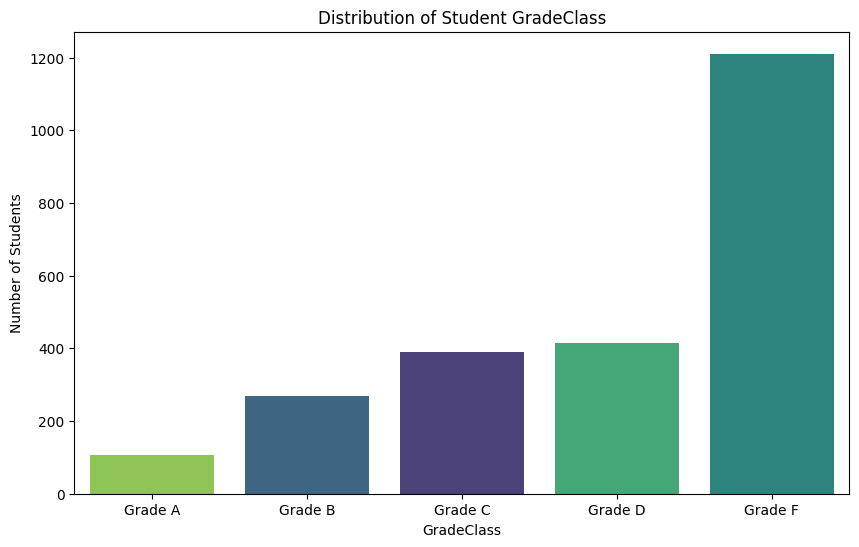

In [474]:
# Membuat Barplot untuk kolom "GradeClass"
plt.figure(figsize=(10, 6))
sns.countplot(x='GradeClass', hue='GradeClass', data=student_df, palette='viridis', legend=False, order=['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F'])
plt.title('Distribution of Student GradeClass')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.show()

📊 Distribution of Student GradeClass:

Kategori:
  - Grade A
  - Grade B
  - Grade C
  - Grade D
  - Grade F

Insight:
  - Grade C adalah yang paling banyak dicapai oleh siswa, diikuti oleh Grade D dan Grade F, yang menunjukkan performa akademik cenderung menengah ke bawah.
  - Hanya sedikit siswa yang mendapatkan Grade A, menunjukkan bahwa pencapaian tertinggi masih jarang.
  - Ini mungkin menjadi indikator adanya masalah dalam efektivitas proses belajar atau faktor eksternal (dukungan orang tua, motivasi, kegiatan tambahan, dsb).

#### Distribusi Numerical Column menggunakan Box Plot

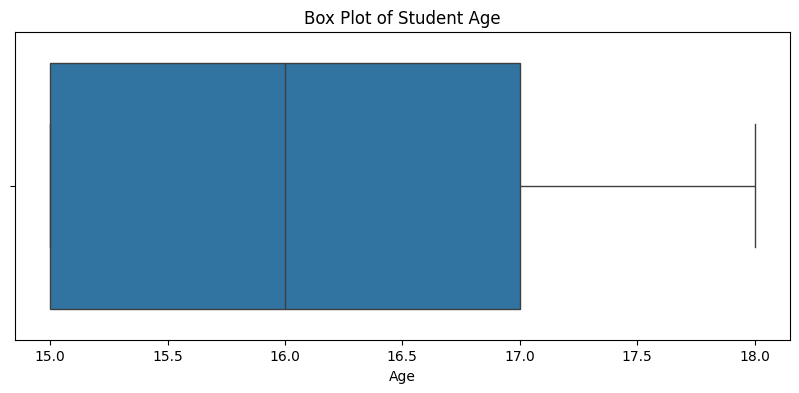

In [475]:
# Buat box plot untuk kolom 'Age'
plt.figure(figsize=(10, 4))
sns.boxplot(x=student_df['Age'])
plt.title('Box Plot of Student Age')
plt.xlabel('Age')
plt.show()

📊 Box Plot of Student Age:

Insight:
  - Rentang usia siswa adalah dari 15 hingga 18 tahun.
  - Mayoritas siswa berusia antara 15,5 hingga 17 tahun, dengan median di sekitar 16 tahun.
  - Tidak terdapat outlier, menandakan distribusi usia cukup normal untuk siswa SMA.



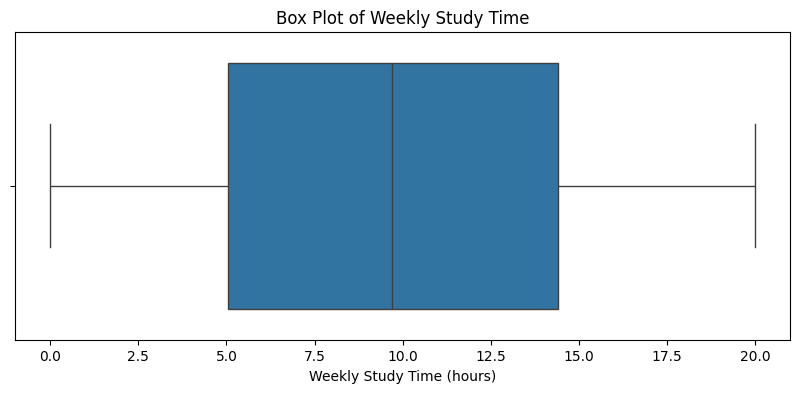

In [476]:
# Buat box plot untuk kolom 'StudyTimeWeekly'
plt.figure(figsize=(10, 4))
sns.boxplot(x=student_df['StudyTimeWeekly'])
plt.title('Box Plot of Weekly Study Time')
plt.xlabel('Weekly Study Time (hours)')
plt.show()

📊 Box Plot of Weekly Study Time:

Insight:
  - Rentang waktu belajar mingguan berkisar antara 0 hingga 20 jam.
  - Median berada sekitar 10 jam/minggu.
  - Hampir semua nilai berada dalam rentang interkuartil, tidak terlihat outlier.
  - Ini mengindikasikan bahwa sebagian besar siswa belajar sekitar 1-2 jam per hari secara konsisten.

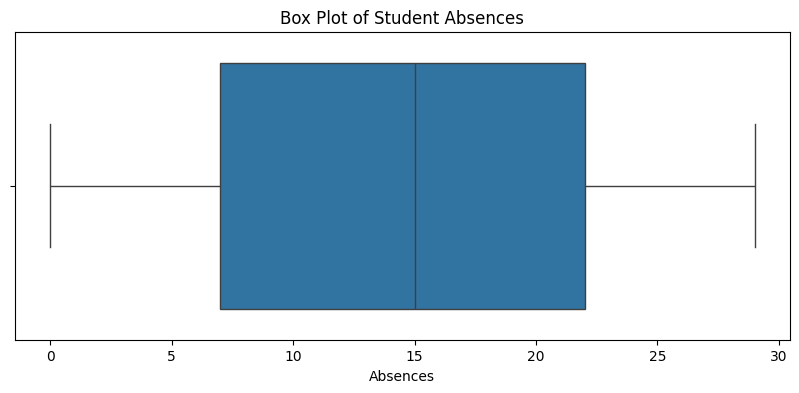

In [477]:
# Buat box plot untuk kolom 'Absences'
plt.figure(figsize=(10, 4))
sns.boxplot(x=student_df['Absences'])
plt.title('Box Plot of Student Absences')
plt.xlabel('Absences')
plt.show()

📊 Box Plot of Student Absences:

Insight:
  - Ketidakhadiran siswa bervariasi antara 0 hingga hampir 30 kali.
  - Median berada di sekitar 15 kali absen, dengan distribusi cukup merata. -
  - Tidak ada outlier ekstrem, tapi ada siswa dengan ketidakhadiran yang cukup tinggi (>25 kali).
  - Ini bisa menjadi indikator penting: siswa dengan banyak absen kemungkinan memiliki GPA lebih rendah atau keterlibatan yang minim.

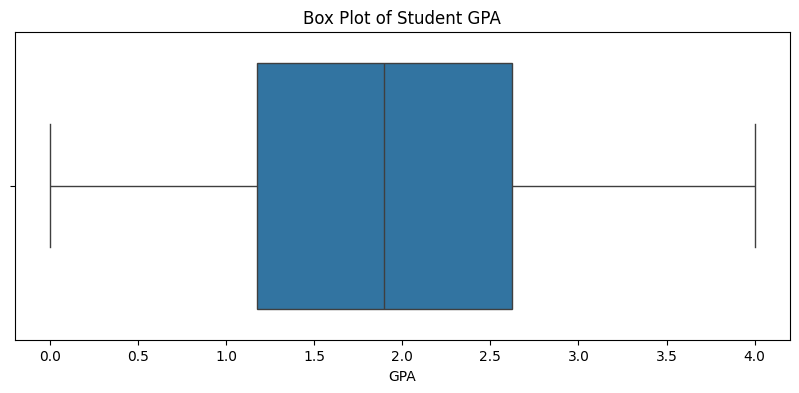

In [478]:
# Buat box plot untuk kolom 'GPA'
plt.figure(figsize=(10, 4))
sns.boxplot(x=student_df['GPA'])
plt.title('Box Plot of Student GPA')
plt.xlabel('GPA')
plt.show()

📊 Box Plot of Student GPA:

Insight:
  - GPA (Grade Point Average) berkisar dari 0 hingga 4.0, sesuai dengan skala umum.
  - Median GPA berada di sekitar 2.0, menandakan sebagian besar siswa memiliki performa akademik rata-rata atau kurang dari baik.
  - Ada penyebaran yang cukup seimbang, tanpa outlier ekstrem.
  - Siswa dengan GPA di bawah 2.0 perlu diperhatikan lebih lanjut (bisa berkaitan dengan waktu belajar, absensi, atau dukungan orang tua).

#### Melihat jumlah siswa pada setiap kelas di GradeClass

In [479]:
grade_count = student_df.GradeClass.value_counts()
grade_count

,count
GradeClass,
Grade F,1211
Grade D,414
Grade C,391
Grade B,269
Grade A,107


#### Membuat pie chart kolom GradeClass

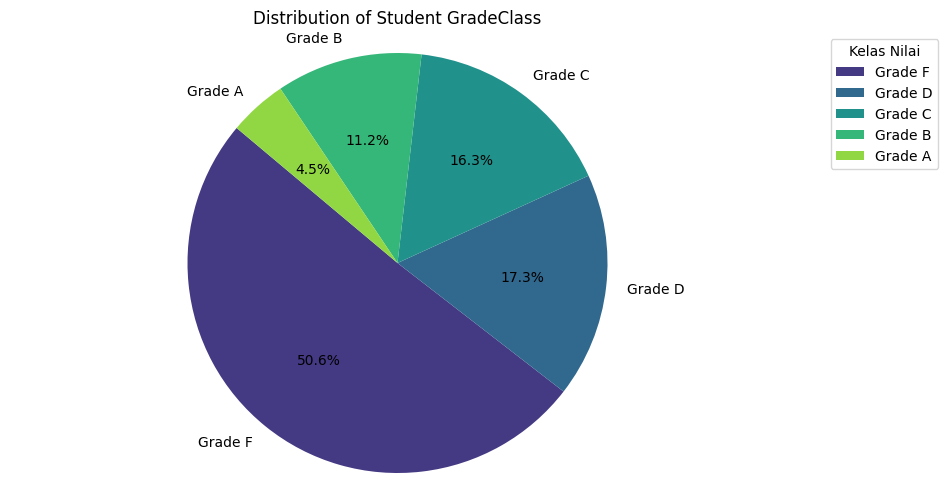

In [480]:
# Pie Chart for GradeClass
plt.figure(figsize=(10, 6))
plt.pie(grade_count, labels=grade_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(grade_count)))
plt.title('Distribution of Student GradeClass')
plt.axis('equal')
plt.legend(title="Kelas Nilai", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

🔹 Distribution of Student GradeClass:
- Berdasarkan hasil yang ditampilkan sebanyak 50.6% Siswa berada pada Grade F (Kelas dengan Prestasi Terendah) menjadi jumlah terbanyak, dan hanya sedikit sekitar 4.5% Siswa berada pada Grade A (Kelas dengan Prestasi Terbaik).
- Sedangkan siswa yang lainnya berada pada Grade B sekitar 11.2% Siswa, Grade C sekitar 16.3% Siswa dan Grade D sekitar 17.3% Siswa.

#### Membuat histogram untuk Numerical Column

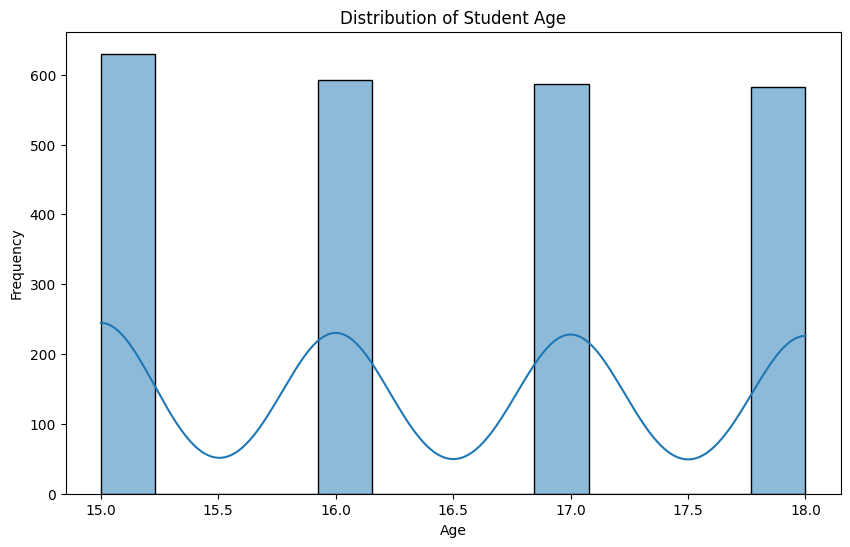

In [481]:
# Membuat histogram untuk kolom 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data=student_df, x='Age', kde=True)
plt.title('Distribution of Student Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

📊 Distribution of Student Age:
- Distribusi usia terlihat multimodal, dengan puncak di usia 15, 16, 17, dan 18 tahun.
- Hal ini menunjukkan bahwa siswa berasal dari berbagai tingkat atau kelas yang memiliki rentang usia relatif luas.
- Distribusi tidak normal dan menunjukkan pola siklis, kemungkinan karena jumlah siswa di tiap tingkat/kelas hampir merata.

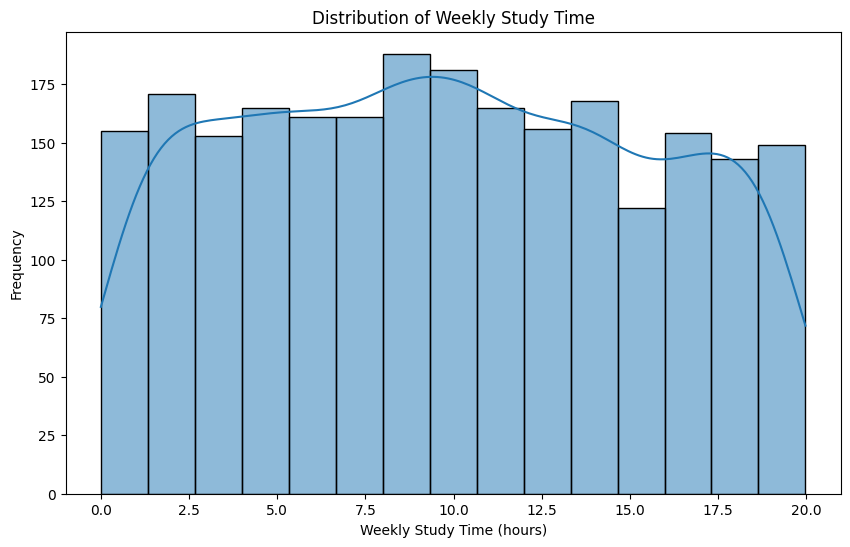

In [482]:
# Membuat histogram untuk kolom 'StudyTimeWeekly'
plt.figure(figsize=(10, 6))
sns.histplot(data=student_df, x='StudyTimeWeekly', kde=True)
plt.title('Distribution of Weekly Study Time')
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('Frequency')
plt.show()

⏳ Distribution of Weekly Study Time:
- Distribusi waktu belajar mingguan mendekati normal dengan puncak di sekitar 8 - 10 jam/minggu.
- Artinya, sebagian besar siswa belajar kurang lebih 1 - 1.5 jam per hari.
- Masih ada sebagian kecil siswa yang belajar di bawah 5 jam atau di atas 15 jam, menunjukkan adanya variasi motivasi atau kebiasaan belajar.


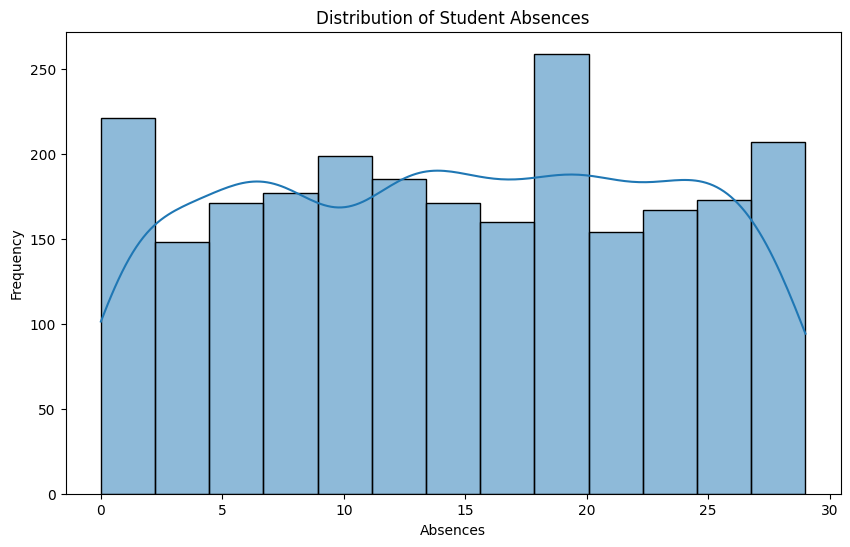

In [483]:
# Membuat histogram untuk kolom 'Absences'
plt.figure(figsize=(10, 6))
sns.histplot(data=student_df, x='Absences', kde=True)
plt.title('Distribution of Student Absences')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.show()

📅 Distribution of Student Absences:
- Distribusi relatif merata, tetapi ada sedikit puncak pada beberapa hari tertentu (sekitar 0, 5, 10, dan 20 hari).
- Ini bisa berarti tidak ada pola absen yang dominan, namun ada kelompok siswa yang sangat rajin (absen sedikit) dan kelompok dengan tingkat absen cukup tinggi (hingga 25–30 hari).
- Hal ini bisa menjadi indikator potensi masalah kehadiran atau disiplin siswa.

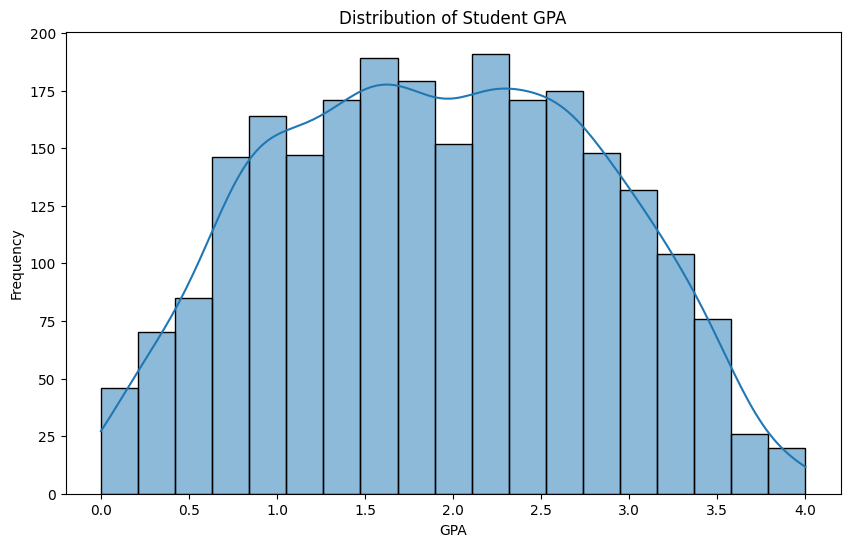

In [484]:
# Membuat histogram untuk kolom 'GPA'
plt.figure(figsize=(10, 6))
sns.histplot(data=student_df, x='GPA', kde=True)
plt.title('Distribution of Student GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()


🏅 Distribution of Student GPA:
- Distribusi prestasi menunjukkan bentuk kurva normal, dengan puncak di sekitar nilai 2.
- Ini menandakan bahwa sebagian besar siswa memiliki prestasi rata-rata, sementara hanya sedikit yang sangat rendah (mendekati 0) atau sangat tinggi (mendekati 4).
- Ini bisa berarti program pengajaran memiliki pengaruh merata terhadap siswa, namun ada peluang peningkatan pada siswa dengan nilai tertinggi atau terendah.



✨ Kesimpulan Umum
- Sebagian besar fitur numerik menunjukkan distribusi yang relatif seimbang atau normal, kecuali usia yang terklasifikasi jelas berdasarkan tingkat kelas.
- Fitur seperti absensi dan waktu belajar bisa dijadikan variabel prediktor penting untuk model klasifikasi prestasi siswa.
- Insight ini mendukung eksplorasi selanjutnya dalam modeling, misalnya klasifikasi siswa berprestasi tinggi dan rendah berdasarkan waktu belajar, absen, dan dukungan lain.

### Multivariate Analysis EDA

Pada bagian ini, akan ditunjukan hubungan antara dua variabel biasa disebut sebagai bivariate EDA. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik

#### Ananlisis data pada fitur numerik `StudyTimeWeekly` dengan `GPA`

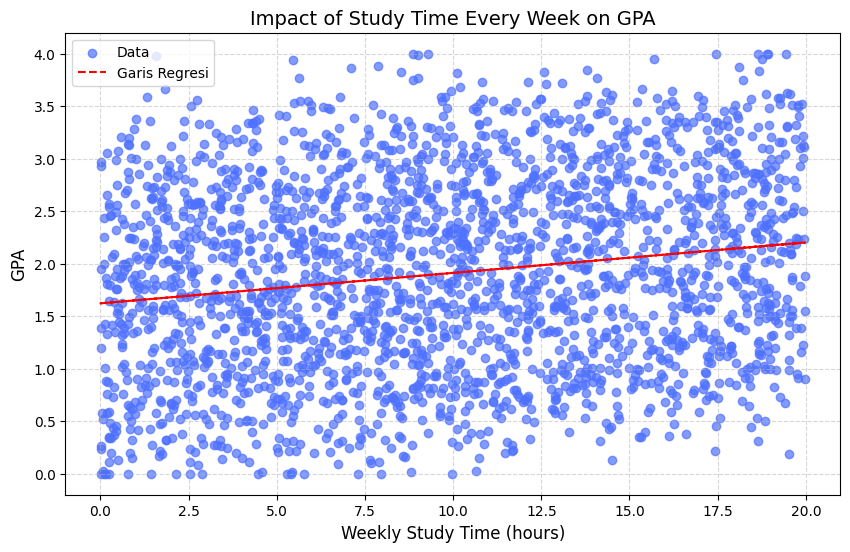

In [485]:
# Menghitung garis regresi
x = student_df['StudyTimeWeekly']
y = student_df['GPA']

# Mencari slope dan intercept
m, b = np.polyfit(x, y, 1)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='#4E71FF', label='Data')

# Garis regresi
plt.plot(x, m*x + b, color='red', linestyle='--', label='Garis Regresi')

# Menambahkan label, judul, dan legenda
plt.title("Impact of Study Time Every Week on GPA", fontsize=14)
plt.xlabel("Weekly Study Time (hours)", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()

📉 Impact of Study Time Every Week on GPA:
- Sumbu X: Waktu Belajar (jam/minggu)
- Sumbu Y: GPA
- Garis Merah: Garis regresi linier

Insight:
- Terdapat korelasi positif lemah: saat waktu belajar meningkat, GPA cenderung meningkat juga.
- Kemiringan garis regresi positif, tetapi sangat landai artinya, tambahan waktu belajar memberikan pengaruh kecil terhadap peningkatan GPA.
- Sebaran data sangat menyebar, menunjukkan banyak variabel lain yang memengaruhi GPA selain waktu belajar.

#### Ananlisis data pada fitur numerik `Absence` dengan `GPA`

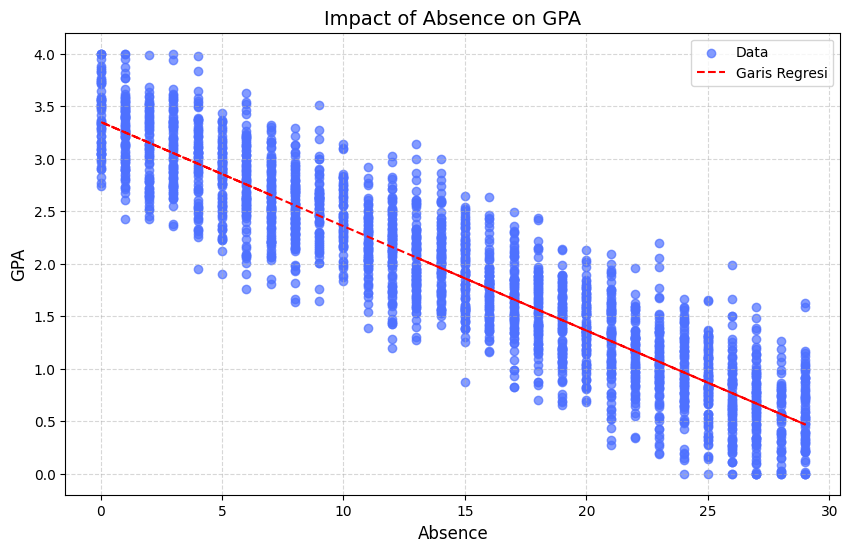

In [486]:
# Menghitung garis regresi
x = student_df['Absences']
y = student_df['GPA']

# Mencari slope dan intercept
m, b = np.polyfit(x, y, 1)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='#4E71FF', label='Data')

# Garis regresi
plt.plot(x, m*x + b, color='red', linestyle='--', label='Garis Regresi')

# Menambahkan label, judul, dan legenda
plt.title("Impact of Absence on GPA", fontsize=14)
plt.xlabel("Absence", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()

📉 Impact of Absence on GPA:
- Sumbu X: Jumlah Absen
- Sumbu Y: GPA
- Garis Merah: Garis regresi linier

Insight:
- Terdapat korelasi negatif kuat: semakin banyak absen, semakin rendah GPA.
- Kemiringan garis regresi negatif tajam, menandakan hubungan yang signifikan.
- Data cukup konsisten menurun dari kiri ke kanan → semakin sering siswa tidak hadir, prestasinya cenderung menurun secara konsisten.

#### Ananlisis data pada fitur kategori `Tutoring` dengan `GradeClass`

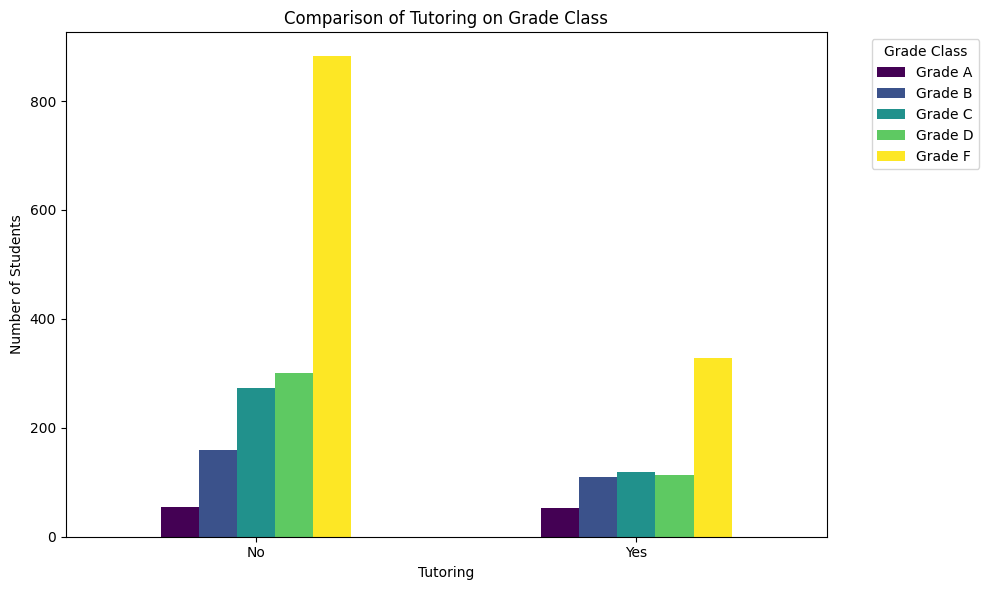

In [487]:
# Menghitung jumlah siswa per kategori bimbingan belajar dan kategori nilai
tutoring_grade_counts = student_df.groupby(['Tutoring', 'GradeClass']).size().unstack(fill_value=0)

# Mengurutkan kolom GradeClass
grade_order = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F']
tutoring_grade_counts = tutoring_grade_counts[grade_order]

# Membuat bar plot
tutoring_grade_counts.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Comparison of Tutoring on Grade Class')
plt.xlabel('Tutoring')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Grade Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

📊 Comparison of Tutoring on GPA:
- Tanpa bimbingan (No) menunjukkan jumlah siswa yang lebih banyak mendapatkan Grade F, D, dan C.
- Dengan bimbingan (Yes), distribusi siswa bergeser ke nilai yang lebih baik, dan jumlah siswa dengan Grade F berkurang signifikan.
- Kesimpulan: Bimbingan belajar cenderung berdampak positif terhadap pencapaian nilai siswa.

#### Ananlisis data pada fitur kategori `Genre` dengan  `GradeClass`

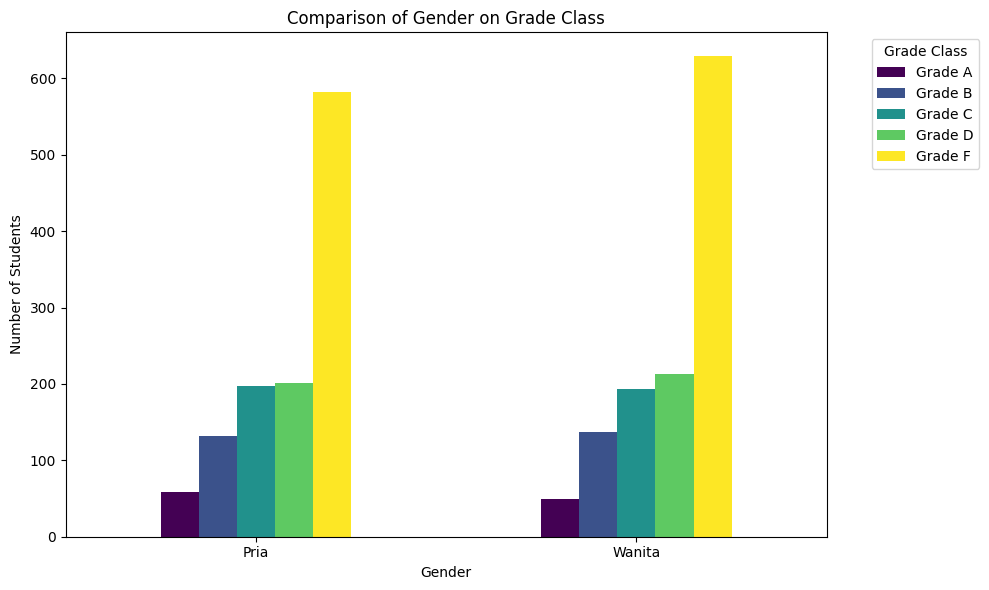

In [488]:
# Menghitung jumlah siswa per jenis kelamin dan kategori nilai
gender_grade_counts = student_df.groupby(['Gender', 'GradeClass']).size().unstack(fill_value=0)

# Mengurutkan kolom GradeClass
grade_order = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F']
gender_grade_counts = gender_grade_counts[grade_order]

# Membuat bar plot
gender_grade_counts.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Comparison of Gender on Grade Class')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Grade Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

📊 Impact of Gender on GPA:
- Perbandingan antara Pria dan Wanita menunjukkan pola distribusi nilai yang hampir serupa.
- Namun, siswa wanita sedikit lebih banyak yang mendapatkan Grade F dibanding pria.
- Kesimpulan: Tidak ada perbedaan signifikan antara pria dan wanita dalam distribusi nilai.

#### Ananlisis data pada fitur kategori kegiatan non akademik `Extracurricular`, `Sports`, `Music`, `Volunteering` dengan `GPA`


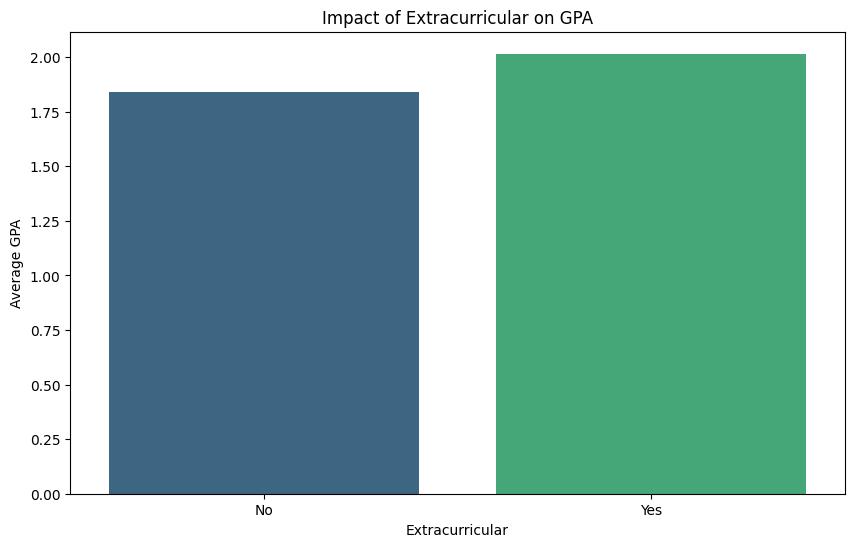

In [489]:
# Calculate the average GPA for each category of Extracurricular activity
extracurricular_gpa = student_df.groupby('Extracurricular')['GPA'].mean().reset_index()

# Create a bar plot for the relationship between Extracurricular and GPA
plt.figure(figsize=(10, 6))
sns.barplot(x='Extracurricular', y='GPA', data=extracurricular_gpa, hue='Extracurricular', palette='viridis')
plt.title('Impact of Extracurricular on GPA')
plt.xlabel('Extracurricular')
plt.ylabel('Average GPA')
plt.show()

📊 Impact of Extracurricular on GPA:
- Siswa yang mengikuti aktivitas ekstrakurikuler memiliki rata-rata GPA lebih tinggi dibandingkan mereka yang tidak ikut.
- Peningkatan ini menunjukkan bahwa kegiatan di luar akademik seperti organisasi, klub, atau kegiatan komunitas dapat berdampak positif terhadap performa belajar.

Kesimpulan:
- Siswa yang aktif secara sosial memiliki keterampilan manajemen waktu yang lebih baik.
- Extracurricular membangun soft skills seperti tanggung jawab, kerjasama, dan kepemimpinan.


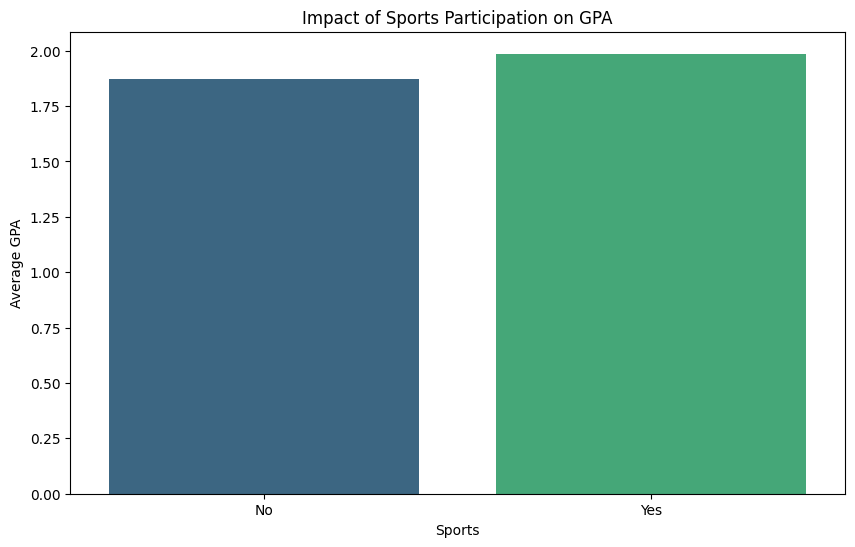

In [490]:
# Calculate the average GPA for each category of Sports activity
sports_gpa = student_df.groupby('Sports')['GPA'].mean().reset_index()

# Create a bar plot for the relationship between Sports and GPA
plt.figure(figsize=(10, 6))
sns.barplot(x='Sports', y='GPA', data=sports_gpa, hue='Sports', palette='viridis')
plt.title('Impact of Sports Participation on GPA')
plt.xlabel('Sports')
plt.ylabel('Average GPA')
plt.show()

📊 Impact of Sports Participation on GPA:
- Siswa yang terlibat dalam olahraga menunjukkan sedikit peningkatan GPA, meskipun tidak sebesar peningkatan dari extracurricular.
- Ini mengindikasikan bahwa aktivitas fisik memiliki dampak positif ringan terhadap akademik.

Kesimpulan:
  - Olahraga dapat membantu meningkatkan fokus, disiplin, dan kesehatan mental.
  - Namun, beban latihan yang tinggi mungkin juga mengurangi waktu belajar jika tidak dikelola dengan baik.


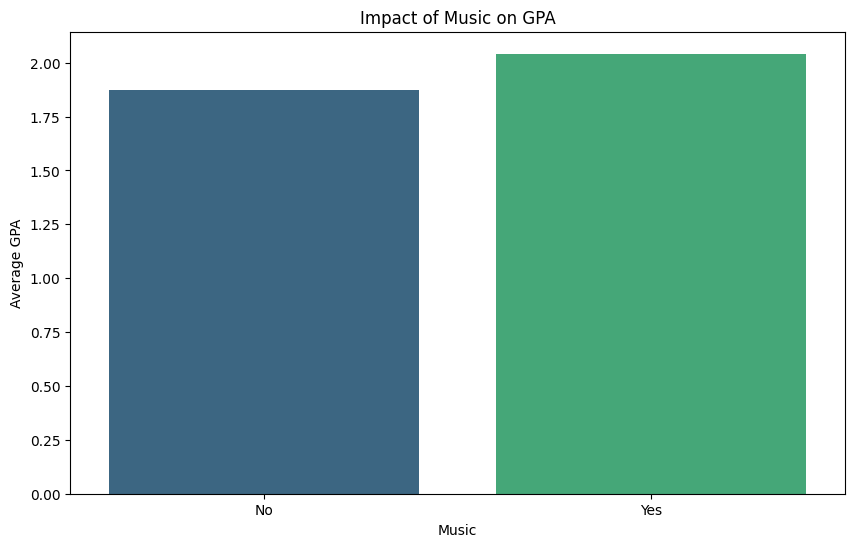

In [491]:
# Calculate the average GPA for each category of Music activity
music_gpa = student_df.groupby('Music')['GPA'].mean().reset_index()

# Create a bar plot for the relationship between Music and GPA
plt.figure(figsize=(10, 6))
sns.barplot(x='Music', y='GPA', data=music_gpa, hue='Music', palette='viridis')
plt.title('Impact of Music on GPA')
plt.xlabel('Music')
plt.ylabel('Average GPA')
plt.show()

📊 Impact of Music on GPA:
- Siswa yang aktif di bidang musik (seperti bermain alat musik, paduan suara, band) menunjukkan peningkatan GPA yang signifikan dibandingkan yang tidak aktif di musik.
- Musik diyakini dapat mengaktifkan area otak yang berkaitan dengan konsentrasi, logika, dan kreativitas.

Kesimpulan:
- Pembelajaran musik melibatkan latihan rutin dan disiplin, yang dapat terbawa ke kebiasaan belajar.
- Musik juga mendukung perkembangan memori dan pemrosesan kognitif.

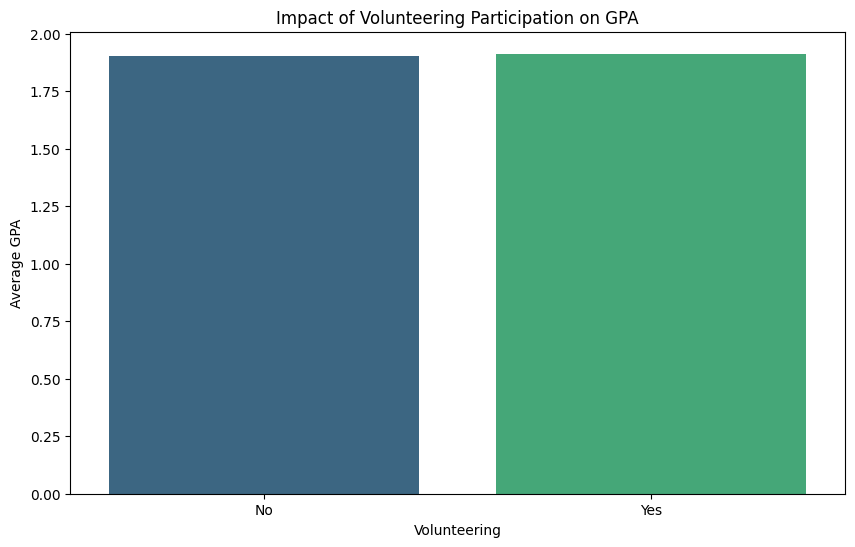

In [492]:
# Calculate the average GPA for each category of Volunteering activity
volunteering_gpa = student_df.groupby('Volunteering')['GPA'].mean().reset_index()

# Create a bar plot for the relationship between Volunteering and GPA
plt.figure(figsize=(10, 6))
sns.barplot(x='Volunteering', y='GPA', data=volunteering_gpa, hue='Volunteering', palette='viridis')
plt.title('Impact of Volunteering Participation on GPA')
plt.xlabel('Volunteering')
plt.ylabel('Average GPA')
plt.show()

📊 Impact of Volunteering Participation on GPA:
- Rata-rata GPA siswa yang melakukan kegiatan volunteering sedikit lebih tinggi dibandingkan dengan siswa yang tidak melakukan volunteering.
- Perbedaannya memang tidak sebesar pada aktivitas seperti music atau extracurricular, namun tren positif tetap terlihat.

Kesimpulan:
- Keterlibatan ini mendorong rasa makna dan motivasi intrinsik siswa, yang bisa meningkatkan komitmen terhadap pembelajaran.
- Siswa yang aktif dalam kegiatan sosial cenderung memiliki disiplin diri dan manajemen waktu yang lebih baik.

#### Ananlisis data pada fitur kategori `ParentalSupport` dengan `GradeClass`

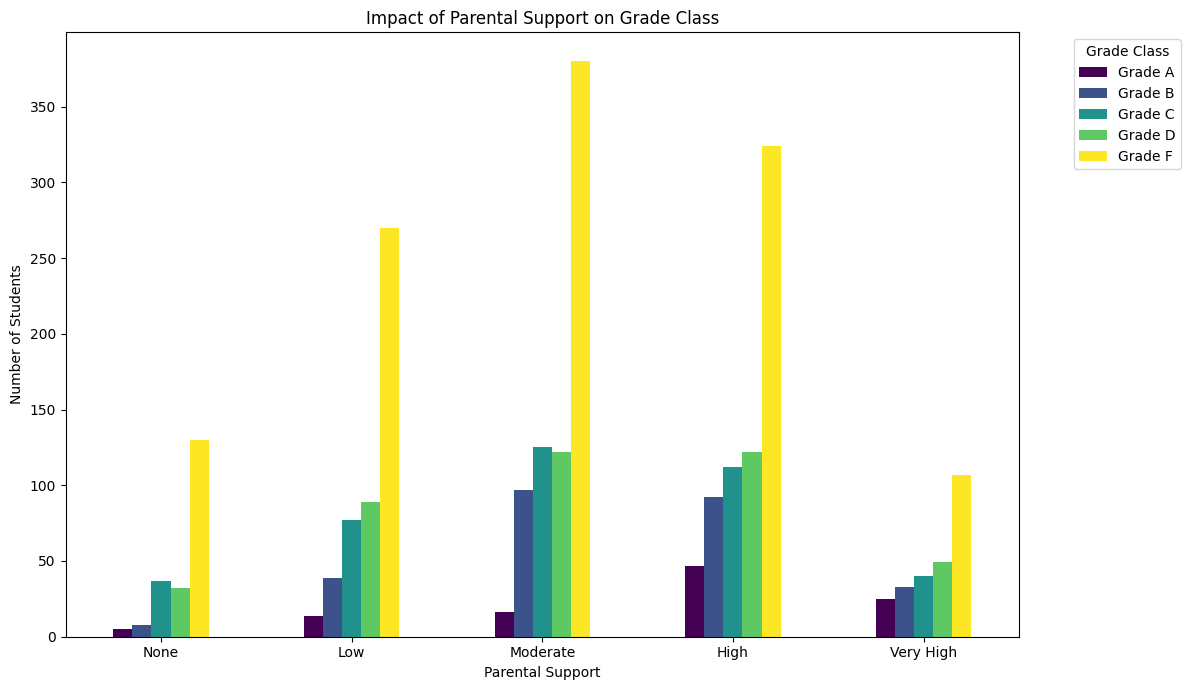

In [493]:
# Menghitung jumlah siswa per tingkat dukungan orang tua dan kategori nilai
parentalsupport_grade_counts = student_df.groupby(['ParentalSupport', 'GradeClass']).size().unstack(fill_value=0)

# Mengurutkan kolom GradeClass
grade_order = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F']
parentalsupport_grade_counts = parentalsupport_grade_counts[grade_order]

# Mengurutkan bar berdasarkan tingkat dukungan orang tua
support_order = ['None', 'Low', 'Moderate', 'High', 'Very High']
parentalsupport_grade_counts = parentalsupport_grade_counts.reindex(support_order)

# Membuat bar plot
parentalsupport_grade_counts.plot(kind='bar', figsize=(12, 7), colormap='viridis')

plt.title('Impact of Parental Support on Grade Class')
plt.xlabel('Parental Support')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Grade Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

📊 Impact of Parental Support on GPA
1. Tingkat Dukungan Orang Tua Rendah hingga Sedang:
  - Mayoritas siswa dengan dukungan orang tua "None", "Low", hingga "Moderate" mendapatkan nilai Grade F, yang jumlahnya sangat tinggi.
  - Hal ini menunjukkan bahwa kurangnya dukungan orang tua berkorelasi negatif terhadap performa akademik siswa.
2. Tingkat Dukungan Tinggi hingga Sangat Tinggi:
  - Ketika dukungan meningkat menjadi "High" atau "Very High", proporsi siswa yang mendapatkan nilai Grade A dan B meningkat.
  - Sementara jumlah siswa dengan Grade F menurun secara signifikan, terutama pada kategori "Very High".
3. Grade A Paling Banyak pada Dukungan "High":
  - Jumlah siswa dengan Grade A tertinggi berada pada kategori "High", bukan "Very High".
  - Ini mungkin menunjukkan bahwa dukungan berlebihan tidak selalu berkorelasi langsung dengan hasil akademik tertinggi, mungkin karena tekanan atau intervensi berlebihan.
4. Distribusi Merata pada Dukungan "Very High":
  - Pada tingkat "Very High", distribusi antar grade terlihat lebih seimbang, dengan penurunan tajam pada Grade F namun juga tanpa lonjakan signifikan pada Grade A.
  - Bisa diinterpretasikan bahwa dukungan sangat tinggi membantu menstabilkan performa siswa, mencegah kegagalan, tapi tidak selalu mendorong performa terbaik.

Kesimpulan:
- Dukungan orang tua memainkan peran penting dalam pencapaian akademik siswa.
- Dukungan yang rendah dikaitkan dengan risiko lebih tinggi mendapatkan nilai rendah (Grade D dan F).
- Dukungan yang cukup hingga tinggi dapat meningkatkan kemungkinan mendapatkan nilai yang lebih baik, namun dukungan yang terlalu tinggi belum tentu menjamin hasil maksimal.
- Strategi pendampingan yang seimbang dan suportif lebih efektif dibanding kontrol berlebihan.

#### Melihat korelasi variabel numerik dengan menggunakan `Heatmap`

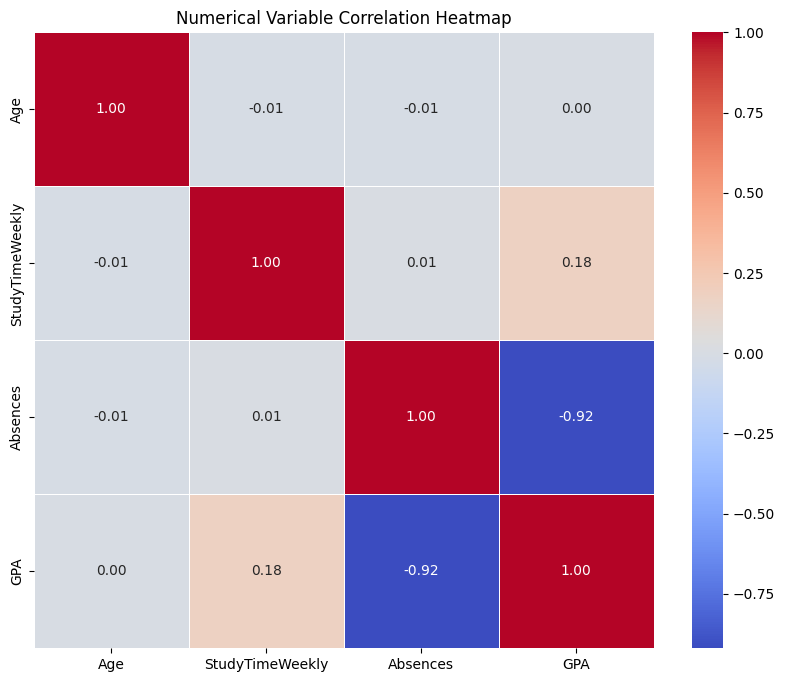

In [494]:
# Pilih kolom numerik
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Hitung matriks korelasi
correlation_matrix = student_df[numerical_columns].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Numerical Variable Correlation Heatmap')
plt.show()

📊 Numerical Variable Correlation Heatmap:
1. Absences vs GPA:

  🔵 Korelasi = -0.92 (sangat kuat negatif)
  - Artinya, semakin sering siswa absen, semakin rendah nilai GPA mereka.
  - Ini menunjukkan hubungan yang sangat signifikan bahwa kehadiran sangat memengaruhi prestasi akademik.

2. StudyTimeWeekly vs GPA:

  🟠 Korelasi = 0.18 (lemah positif)
  - Waktu belajar per minggu memiliki korelasi positif tapi lemah terhadap GPA.
  - Ini mengindikasikan bahwa lebih banyak belajar cenderung meningkatkan GPA, meskipun efeknya tidak terlalu besar secara statistik dalam data ini.

3. Age vs GPA:

  ⚪ Korelasi ≈ 0.00 (tidak signifikan)
  - Usia siswa tidak menunjukkan pengaruh berarti terhadap GPA.
  - Bisa disimpulkan bahwa usia bukan faktor utama dalam menentukan kinerja akademik pada kelompok data ini.

#### Melihat `Plot Scatter` yang Memiliki Nilai Korelasi Positif dan Negatif

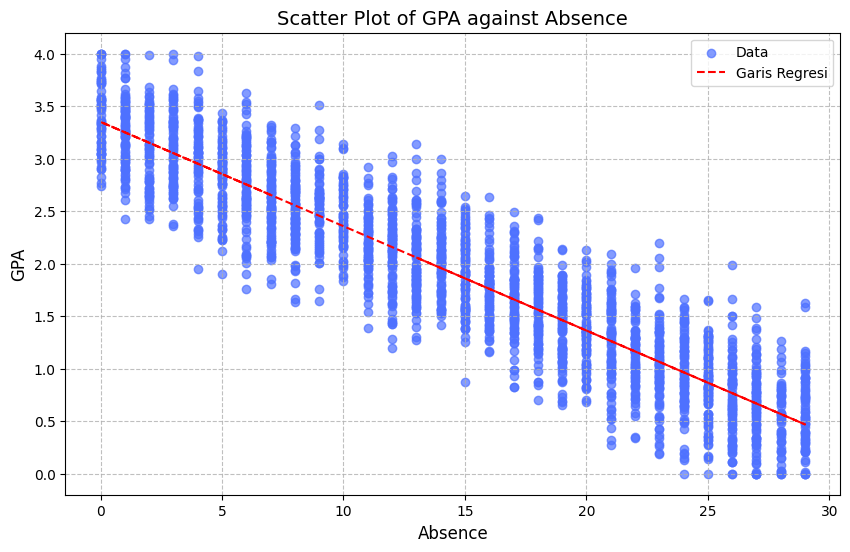

In [495]:
# Menghitung garis regresi
x = student_df['Absences']
y = student_df['GPA']

# Mencari slope dan intercept
m, b = np.polyfit(x, y, 1)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='#4E71FF', label='Data')

# Garis regresi
plt.plot(x, m*x + b, color='red', linestyle='--', label='Garis Regresi')

# Menambahkan label, judul, dan legenda
plt.title("Scatter Plot of GPA against Absence", fontsize=14)
plt.xlabel("Absence", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.legend()
plt.grid(alpha=0.8, linestyle='--')
plt.show()

Insight:
- Terdapat korelasi negatif kuat: semakin banyak absen, semakin rendah GPA.
- Kemiringan garis regresi negatif tajam, menandakan hubungan yang signifikan.
- Data cukup konsisten menurun dari kiri ke kanan → semakin sering siswa tidak hadir, prestasinya cenderung menurun secara konsisten.

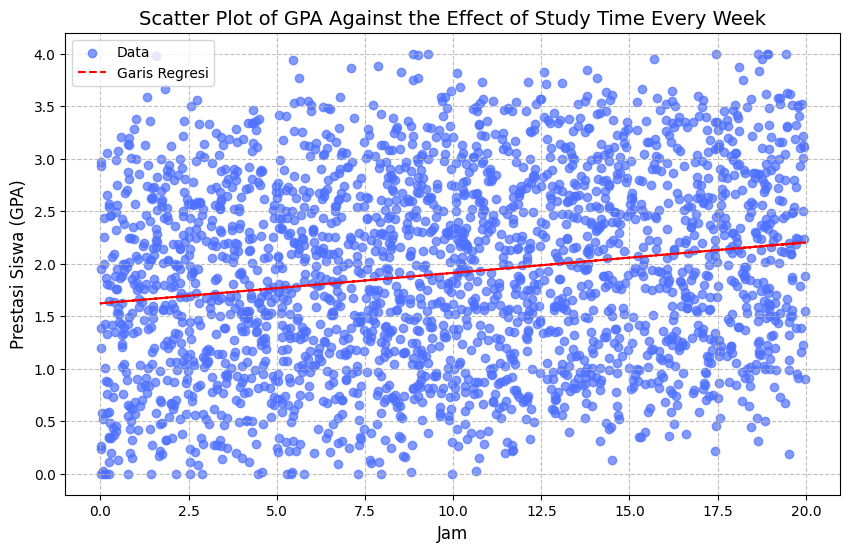

In [496]:
# Menghitung garis regresi
x = student_df['StudyTimeWeekly']
y = student_df['GPA']

# Mencari slope dan intercept
m, b = np.polyfit(x, y, 1)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='#4E71FF', label='Data')

# Garis regresi
plt.plot(x, m*x + b, color='red', linestyle='--', label='Garis Regresi')

# Menambahkan label, judul, dan legenda
plt.title("Scatter Plot of GPA Against the Effect of Study Time Every Week", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Prestasi Siswa (GPA)", fontsize=12)
plt.legend()
plt.grid(alpha=0.8, linestyle='--')
plt.show()

Insight:
- Terdapat korelasi positif lemah: saat waktu belajar meningkat, GPA cenderung meningkat juga.
- Kemiringan garis regresi positif, tetapi sangat landai artinya, tambahan waktu belajar memberikan pengaruh kecil terhadap peningkatan GPA.
- Sebaran data sangat menyebar, menunjukkan banyak variabel lain yang memengaruhi GPA selain waktu belajar.

## Data Preparation

Pada tahap ini kita akan melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahap persiapan data perlu dilakukan, yaitu
1. Cleaning Data.
2. Encoding Categorical Feature.
4. Data Spliting.

### Cleaning Data

In [497]:
# Melakukan drop column `StudentID`, `Ethnicity` dan `ParentalEducation`.
student_df = student_df.drop(columns = ["StudentID"])
student_df = student_df.drop(columns = ["Ethnicity"])
student_df = student_df.drop(columns = ["ParentalEducation"])

In [498]:
print("Dataset After Cleaning :\n")
student_df.info()

Dataset After Cleaning :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2392 non-null   int64  
 1   Gender           2392 non-null   object 
 2   StudyTimeWeekly  2392 non-null   float64
 3   Absences         2392 non-null   int64  
 4   Tutoring         2392 non-null   object 
 5   ParentalSupport  2392 non-null   object 
 6   Extracurricular  2392 non-null   object 
 7   Sports           2392 non-null   object 
 8   Music            2392 non-null   object 
 9   Volunteering     2392 non-null   object 
 10  GPA              2392 non-null   float64
 11  GradeClass       2392 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 224.4+ KB


### Encoding Categorical Feature

Pada bagian ini, karena dataset fitur kategori kita sebelumnya sudah diubah dalam bentuk objek (string) pada tahap eksplorasi data analis maka kita perlu mengubah data kategori (yang berbentuk teks atau label) menjadi format numerik agar dapat diproses oleh algoritma machine learning.
Encoding Fitur Kategorikal dilakukan 3 bagian, yakni:
1. *Label Encoding* berfungsi untuk mengonversi nilai kategori menjadi angka integer (0 dan 1)). Variabel yang akan diproses yakni:<br>
  a. `Tutoring` (Apakah siswa mengikuti bimbingan belajar?) <br>
  b. `Extracurricular` (Apakah siswa mengikuti kegiatan ektrakulikuler?) <br>
  c. `Sports` (Apakah siswa mengikuti kegiatan olahraga? <br>
  d. `Music` (Apakah siswa mengikuti kegiatan musik?) <br>
  e. `Volunteering` (Apakah siswa mengikuti kegiatan sukarelaan?)
2. *One Hot Ecoding* berfungsi untuk mengubah setiap kategori menjadi kolom biner terpisah untuk data tidak terurut). Variabel yang akan diproses yakni `Gender`.
3. *Ordinal Encoding* berfungsi untuk memberikan nilai integer berdasarkan hierarki atau urutan kategori. Variabel yang akan diproses yakni `ParentalSupport`.

**Label Encoding**

In [499]:
# Label Encoding
# Membuat list kolom-kolom kategorikal yang memiliki entri antara yes dan no
categorical_col = ["Tutoring", "Extracurricular", "Sports", "Music", "Volunteering"]

# Mengubah nilai yes menjadi 1 dan nilai no menjadi 0 pada seluruh kolom tersebut
for i in categorical_col:
    student_df[i] = student_df[i].map({"Yes": 1, "No": 0})

**One hot Encoding**

In [500]:
# One-hot Encoding
# Membentuk kolom dummy dari kolom Gender
data_encoded = pd.get_dummies(student_df[["Gender"]], drop_first = True)

# Menggabungkan data asli dengan data dummy yang telah dibuat
student_df = pd.concat([student_df, data_encoded], axis = 1)

# Menghapus kolom Gender
student_df.drop(columns = ["Gender"], inplace = True)

**Ordinal Enncoding**

In [501]:
# Ordinal Encoding
# Mendefinisikan urutan encoding
encoding_mapping = {'Very High':4, 'High':3, 'Moderate':2, 'Low':1, 'None':0}

# Lakukan encoding
student_df['ParentalSupport'] = student_df['ParentalSupport'].map(encoding_mapping)

# Menampilkan 5 baris pertama dari data setelah dilakukan data preprocessing
student_df.head()

,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Gender_Wanita
0,17,19.833723,7,1,2,0,0,1,0,2.929196,Grade C,True
1,18,15.408756,0,0,1,0,0,0,0,3.042915,Grade B,False
2,15,4.210570,26,0,2,0,0,0,0,0.112602,Grade F,False
3,17,10.028829,14,0,3,1,0,0,0,2.054218,Grade D,True
4,17,4.672495,17,1,3,0,0,0,0,1.288061,Grade F,True


### Data Spliting

Langkah awal, karena target kita adalah variabel GradeClass untuk mengetahui akurasi prediksi dari kategori kelas prestasi terbaik, maka kita akan membuang kolom tersebut dari data dan assign kolom tersebut ke variabel baru.

In [502]:
# Menyiapkan fitur (X) dan target (y)
x = student_df.drop('GradeClass',axis=1)
y = student_df['GradeClass']  # Target

#  Membagi data menjadi 20% test size
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    shuffle=True,
    random_state=15
)

In [503]:
# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran x_train: ", x_train.shape)
print("Ukuran x_test: ", x_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran x_train:  (1913, 11)
Ukuran x_test:  (479, 11)
Ukuran y_train:  (1913,)
Ukuran y_test:  (479,)


In [504]:
# Menampilkan 5 baris pertama dari data training X
x.head()

,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Gender_Wanita
0,17,19.833723,7,1,2,0,0,1,0,2.929196,True
1,18,15.408756,0,0,1,0,0,0,0,3.042915,False
2,15,4.210570,26,0,2,0,0,0,0,0.112602,False
3,17,10.028829,14,0,3,1,0,0,0,2.054218,True
4,17,4.672495,17,1,3,0,0,0,0,1.288061,True


In [505]:
# Menampilkan nilai-nilai dan jumlah dari variabel target
original_labels = y_test.value_counts()
original_labels

,count
GradeClass,
Grade F,243
Grade D,83
Grade C,78
Grade B,54
Grade A,21


In [506]:
# And the LabelEncoder for the target:
le = LabelEncoder()

# Melakukan fitting terhadap data training dan mentransformasikan data training dan testing
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Model Development

Pada bagian ini, kita akan membangun 4 model machine learning untuk menguji sebarapa baik akurasi model, sehingga model tersebut yang disarankan untuk memprediksi prestasi siswa.

1. Model `RandomForest`
2. Model `XGBoost`
3. Model `SVM`
4. Model `Naive Bayes`

### Model Random Forest

In [507]:
# Memanggil fungsi RandomForestClassifier dari library sklearn
rf_model = RandomForestClassifier(n_estimators = 200, criterion = "entropy", max_depth = 10, random_state = 50)

# Melatih model Random Forest dengan data training pada X dan y
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=50)

In [508]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
y_pred_rf = rf_model.predict(x_test)

# Evaluasi Model
acc_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print("Akurasi pada data uji:", acc_rf, "%")

Akurasi pada data uji: 92.69 %


Laporan Klasifikasi untuk Model Random Forest:
              precision    recall  f1-score   support

     Grade A       0.87      0.62      0.72        21
     Grade B       0.87      0.87      0.87        54
     Grade C       0.92      0.92      0.92        78
     Grade D       0.92      0.88      0.90        83
     Grade F       0.94      0.98      0.96       243

    accuracy                           0.93       479
   macro avg       0.91      0.86      0.88       479
weighted avg       0.93      0.93      0.93       479



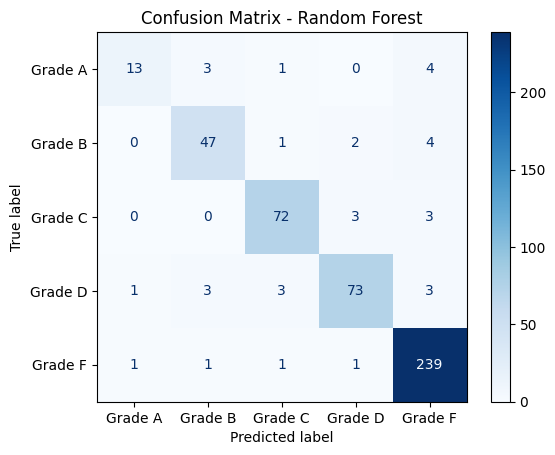

In [509]:
# Membuat matriks konfusi untuk model Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

target_names = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F']

# Menampilkan laporan klasifikasi untuk model Random Forest
print("Laporan Klasifikasi untuk Model Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# Menampilkan matriks konfusi
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

Kelebihan:
- Sangat akurat untuk prediksi Grade C (72), Grade D (73), dan terutama Grade F (239).
- Grade B juga diprediksi dengan cukup baik (47 benar, hanya 7 salah prediksi).

Kelemahan:
- Sedikit kesulitan dalam mengenali Grade A (13 benar, 8 salah), cukup tinggi untuk kategori ini.
- Ada kesalahan minor seperti Grade B → Grade F (4 kasus).

Insight:
> Random Forest memberikan performa stabil dan akurat, terutama untuk kelas dengan jumlah data besar seperti Grade F. Namun masih ada sedikit kebingungan antar kelas yang berdekatan (A ↔ B, D ↔ C), meskipun tidak signifikan.

### Model XGBoost

In [510]:
# Memanggil fungsi XGBClassifier dari library sklearn
xgb_model = XGBClassifier(max_depth = 6, n_estimators = 125,
                          random_state = 30, learning_rate = 0.01, n_jobs = -1)

# Melatih model XGBoost dengan data training pada X dan y
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [511]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
y_pred_xgb = xgb_model.predict(x_test)


acc_xgb = round(accuracy_score(y_test, y_pred_xgb)*100, 2)
# Evaluasi Model
print("Akurasi pada data uji:", acc_xgb, "%")

Akurasi pada data uji: 93.32 %


Laporan Klasifikasi untuk Model XGBoost:
              precision    recall  f1-score   support

     Grade A       0.89      0.76      0.82        21
     Grade B       0.92      0.89      0.91        54
     Grade C       0.94      0.92      0.93        78
     Grade D       0.91      0.88      0.90        83
     Grade F       0.94      0.98      0.96       243

    accuracy                           0.93       479
   macro avg       0.92      0.89      0.90       479
weighted avg       0.93      0.93      0.93       479



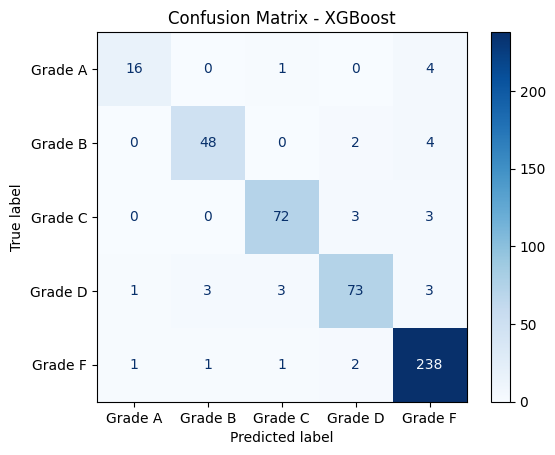

In [512]:
# Membuat matriks konfusi untuk model XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

target_names = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F']

# Menampilkan laporan klasifikasi untuk model XGBoost
print("Laporan Klasifikasi untuk Model XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

# Menampilkan matriks konfusi
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=target_names)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()

Kelebihan:
- Meningkatkan akurasi pada Grade A (16 benar, hanya 5 salah), lebih baik dibandingkan Random Forest.
- Konsisten sangat baik untuk Grade C (72), Grade D (73), dan Grade F (238).
- Grade B juga cukup akurat (48 benar).

Kelemahan:
- Hampir tidak ada, distribusi kesalahan sangat minim dan merata.

Insight:
> XGBoost memberikan hasil paling stabil dan presisi tinggi di antara semua model. Hampir tidak ada label yang benar-benar membingungkan model, menandakan pemisahan fitur yang efektif. Ini menandakan XGBoost kemungkinan adalah model terbaik dari keempatnya untuk kasus ini.

### Model SVM

In [513]:
# Memanggil fungsi SVC dari library sklearn
svm_model = SVC(kernel = 'rbf', gamma = 'auto', random_state = 50)

# Melatih model SVM dengan data training pada X dan y
svm_model.fit(x_train, y_train)

SVC(gamma='auto', random_state=50)

In [514]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
y_pred_svm = svm_model.predict(x_test)


acc_svm = round(accuracy_score(y_test, y_pred_svm)*100, 2)
# Evaluasi Model
print("Akurasi pada data uji:", acc_svm, "%")

Akurasi pada data uji: 78.08 %


Laporan Klasifikasi untuk Model SVM:
              precision    recall  f1-score   support

     Grade A       0.50      0.24      0.32        21
     Grade B       0.61      0.57      0.59        54
     Grade C       0.67      0.72      0.70        78
     Grade D       0.68      0.64      0.66        83
     Grade F       0.89      0.94      0.92       243

    accuracy                           0.78       479
   macro avg       0.67      0.62      0.64       479
weighted avg       0.77      0.78      0.77       479



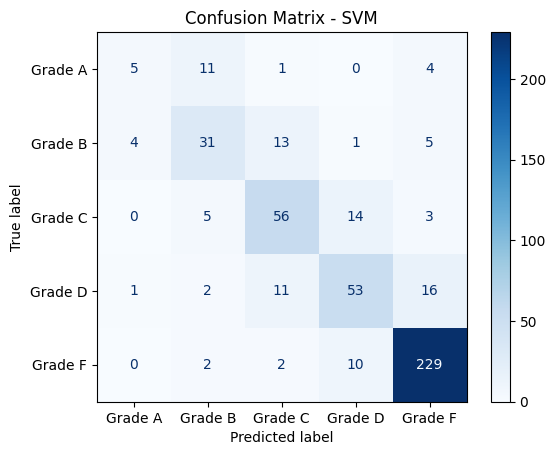

In [515]:
# Membuat matriks konfusi untuk model SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

target_names = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F']

# Menampilkan laporan klasifikasi untuk model SVM
print("Laporan Klasifikasi untuk Model SVM:")
print(classification_report(y_test, y_pred_svm, target_names=target_names))

# Menampilkan matriks konfusi
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=target_names)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.show()

Kelebihan:
- Masih mampu mengenali Grade F (229 benar) dan Grade C (56 benar) dengan baik.

Kelemahan:
- Performa untuk Grade A (5 benar dari 21) dan Grade B (31 benar dari 54) cukup buruk.
- Banyak kesalahan antar kelas tengah seperti Grade B → C, D → C, C → D.
- Banyak prediksi Grade D salah ke Grade F (16 kasus).

Insight:
> SVM tampaknya mengalami overlap antar kelas tengah (B–C–D). Hal ini mengindikasikan bahwa decision boundary SVM tidak bekerja optimal di dataset ini—kemungkinan karena distribusi data tidak linier atau kurang terpisah dengan jelas.

### Model Naive Bayes

In [516]:
# Membuat model dengan parameter khusus
nb_model = GaussianNB(var_smoothing=1e-9)

# Melatih model
nb_model.fit(x_train, y_train)

GaussianNB()

In [517]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
y_pred_nb = nb_model.predict(x_test)

acc_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
# Evaluasi Model
print("Akurasi pada data uji:", acc_nb, "%")

Akurasi pada data uji: 79.33 %


Laporan Klasifikasi untuk Model Naive Bayes:
              precision    recall  f1-score   support

     Grade A       0.67      0.10      0.17        21
     Grade B       0.56      0.61      0.58        54
     Grade C       0.69      0.78      0.73        78
     Grade D       0.68      0.78      0.73        83
     Grade F       0.94      0.90      0.92       243

    accuracy                           0.79       479
   macro avg       0.71      0.63      0.63       479
weighted avg       0.80      0.79      0.79       479



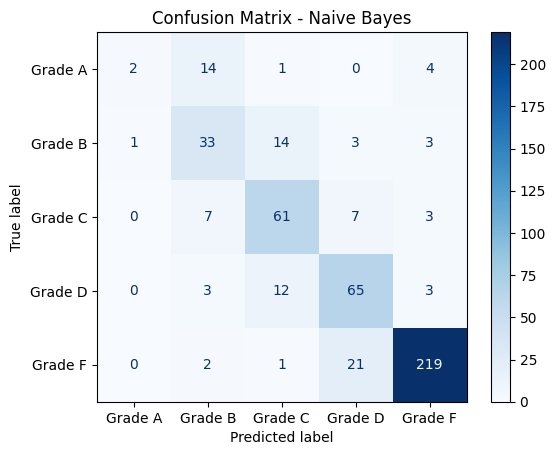

In [518]:
# Membuat matriks konfusi untuk model Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

target_names = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F']

# Menampilkan laporan klasifikasi untuk model Naive Bayes
print("Laporan Klasifikasi untuk Model Naive Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=target_names))

# Menampilkan matriks konfusi
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=target_names)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Kelebihan:
- Cukup baik untuk prediksi Grade C (61) dan Grade D (65).

Kelemahan:
- Grade A (2 benar dari 21) dan Grade B (33 benar dari 54) jauh dari baik.
- Salah satu error terbesar adalah Grade F → Grade D (21 kasus), sangat tinggi.
- Banyak kebingungan antara Grade B dan Grade C.

Insight:
> Naive Bayes tampaknya tidak cocok untuk dataset ini, mungkin karena asumsi independensi antar fitur yang tidak terpenuhi. Model ini terlihat sangat keliru dalam memetakan Grade F dan Grade A. Ini juga bisa berarti data memiliki fitur yang saling tergantung atau tidak cocok dengan distribusi probabilistik Naive Bayes.



## Evaluasi Model

### Melihat perbandingan akurasi model

In [519]:
# Membentuk DataFrame berisi model dan akurasinya
all_models = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "SVM", "Naive Bayes"],
    "Accuracy": [acc_rf, acc_xgb, acc_svm, acc_nb]
})

# Mengurutkan data berdasarkan akurasi dari tertinggi ke terendah
all_models.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,XGBoost,93.32
0,Random Forest,92.69
3,Naive Bayes,79.33
2,SVM,78.08


### Melihat perbandingan akurasi model dengan grafik barplot

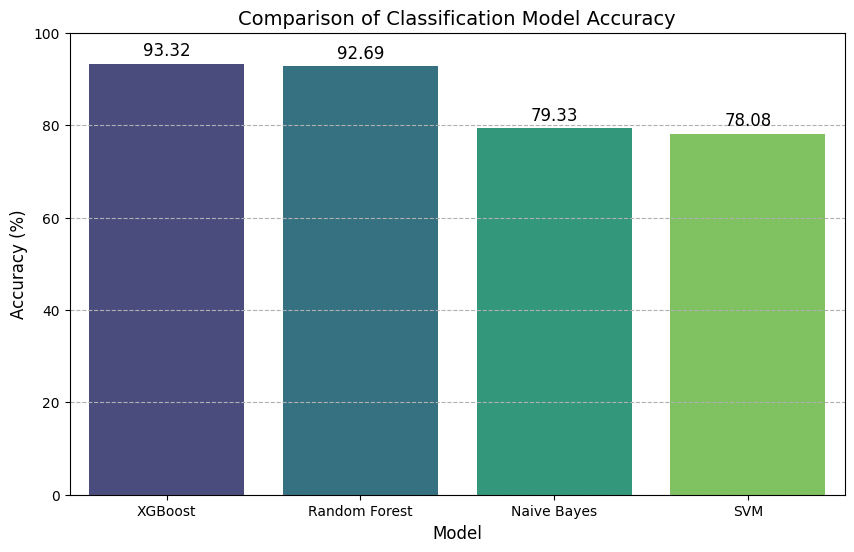

In [520]:
# Visualisasi Perbandingan Akurasi Model
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=all_models.sort_values(by='Accuracy', ascending=False), hue="Model", palette='viridis')
plt.title('Comparison of Classification Model Accuracy', fontsize=14)

# Menambahkan nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100) # Atur batas y dari 0 hingga 100
plt.grid(axis='y', linestyle='--')
plt.show()

🔍 Insight Tambahan dari Grafik Accuracy:
1. ✅ XGBoost (93.32%) – Terbaik
  - Paling tinggi akurasinya.
  - Sejalan dengan hasil confusion matrix: kesalahan prediksi paling kecil dan distribusi prediksi yang hampir ideal.
  - Rekomendasi utama jika ingin akurasi maksimal dan stabilitas prediksi antar kelas.

2. ✅ Random Forest (92.69%) – Sangat Kompetitif
  - Hanya selisih ~0.63% dari XGBoost.
  - Sangat baik dalam menangani kelas-kelas dominan seperti Grade F dan Grade C.
  - Bisa dipilih jika ingin model yang sedikit lebih cepat dilatih dibanding XGBoost.

3. ⚠️ Naive Bayes (79.33%) – Signifikan Lebih Rendah
  - Akurasi turun drastis hampir 14% dibanding XGBoost.
  - Confusion matrix menunjukkan banyak kebingungan antar kelas tengah, terutama Grade B dan Grade D.
  - Asumsi independensi antar fitur kemungkinan besar tidak terpenuhi di dataset ini.

4. ⚠️ SVM (78.08%) – Performa Terendah
  - Memiliki akurasi paling rendah dari keempat model.
  - Banyak kesalahan di kelas Grade A, B, D—ditunjukkan oleh confusion matrix.
  - SVM kurang cocok untuk dataset ini, bisa jadi karena dimensi data tinggi atau non-linearitas.

## Predictive Analytics for Student Grade Class menggunakan XGBoost

### Melihat Faktor penting yang mempengaruhi `Grade Class`

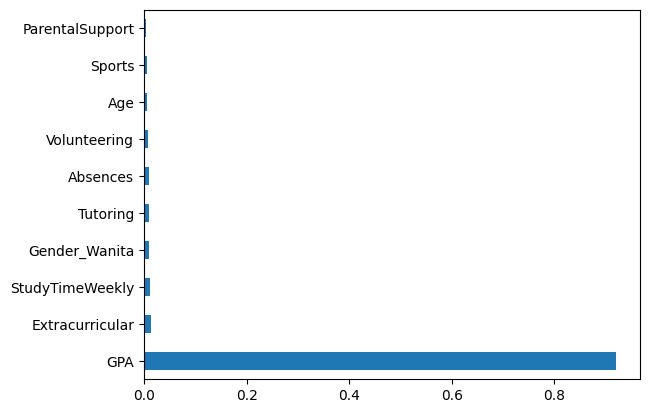

In [521]:
# Menggunakan Model XGboost dengan accuracy tertinggi menampilkan feature col yang paling berpengaruh
importances = pd.Series(
    xgb_model.feature_importances_,
    index=x_train.columns
)

importances.nlargest(10).plot(kind="barh")
plt.show()

### Mengukur precision, recall, F1-score per kelas dan menghasilkan confusion matrix.

Classification Report for XGBoost:
              precision    recall  f1-score   support

     Grade A       0.89      0.76      0.82        21
     Grade B       0.92      0.89      0.91        54
     Grade C       0.94      0.92      0.93        78
     Grade D       0.91      0.88      0.90        83
     Grade F       0.94      0.98      0.96       243

    accuracy                           0.93       479
   macro avg       0.92      0.89      0.90       479
weighted avg       0.93      0.93      0.93       479



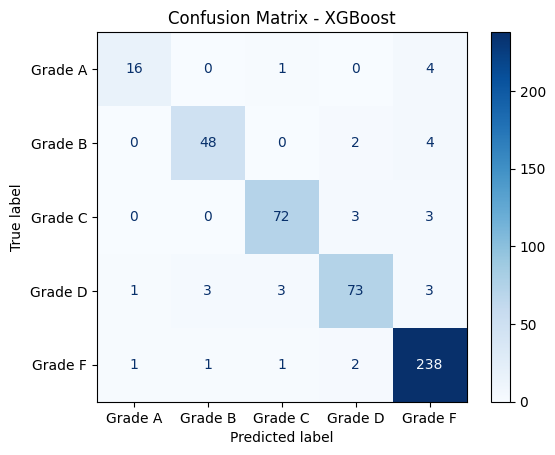

In [527]:
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

# Menampilkan matriks konfusi
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=target_names)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [523]:
def infer_grade_class(model, label_encoder):
    """
    Fungsi untuk melakukan prediksi GradeClass siswa.
    model: trained classifier (sudah fit pada X yang berurutan seperti di bawah)
    label_encoder: LabelEncoder yang dipakai untuk encode target GradeClass
    """

    print("Masukkan data berikut untuk prediksi GradeClass siswa:\n")

    # 1. Input numerik
    age               = int(  input("Umur siswa (Tahun): ") )
    study_time_weekly = float(input("Jam belajar per minggu (StudyTimeWeekly): ") )
    absences          = int(  input("Jumlah absensi (Absences): ") )
    gpa               = float(input("GPA (0.0 – 4.0): ") )

    # 2. Input kategorikal biner / ordinal
    tutoring          = input("Mengikuti bimbingan belajar? (1:Ya, 0:Tidak): ").strip()
    parental_support  = int(  input("Skala dukungan orang tua (misal 1–3): ") )
    extracurricular    = input("Ekstrakurikuler? (1:Ya, 0:Tidak): ").strip()
    sports            = input("Ikut kegiatan olahraga? (1:Ya, 0:Tidak): ").strip()
    music             = input("Ikut kegiatan musik? (1:Ya, 0:Tidak): ").strip()
    volunteering      = input("Ikut kegiatan sosial/volunteering? (1:Ya, 0:Tidak): ").strip()
    gender_input      = input("Jenis kelamin (Pria/Wanita): ").strip().lower()

    # 3. Mapping ke integer sesuai kolom X pada model
    tutoring       = 1 if tutoring in ('1','ya','yes','y') else 0
    extracurricular = 1 if extracurricular in ('1','ya','yes','y') else 0
    sports         = 1 if sports in ('1','ya','yes','y') else 0
    music          = 1 if music in ('1','ya','yes','y') else 0
    volunteering   = 1 if volunteering in ('1','ya','yes','y') else 0
    gender_wanita  = 1 if gender_input in ('female','wanita','f') else 0

    # 4. Susun fitur sesuai urutan X.columns:
    fitur_input = np.array([[
        age,
        study_time_weekly,
        absences,
        tutoring,
        parental_support,
        extracurricular,
        sports,
        music,
        volunteering,
        gpa,
        gender_wanita
    ]])

    # 5. Prediksi (menghasilkan encoded label, misal 0–4)
    pred_encoded = model.predict(fitur_input)

    # 6. Inverse-transform untuk dapat kelas asli (angka/string)
    pred_raw = label_encoder.inverse_transform(pred_encoded)[0]

    # 7. Mapping ke letter grade (jika label_encoder memberikan angka 0–4):
    letter_map = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'F'
    }
    # _jika_ label_encoder.classes_ sudah berisi ['A','B','C','D','F'],
    # maka pred_raw == 'B' langsung; kalau numeric, pakai mapping:
    if isinstance(pred_raw, (int, np.integer)):
        grade_letter = letter_map.get(int(pred_raw), str(pred_raw))
    else:
        # pred_raw mungkin string seperti '3' atau 'B'
        grade_letter = pred_raw if pred_raw in letter_map.values() else str(pred_raw)

    print(f"\nPrediksi GradeClass siswa adalah: {grade_letter}")
    return grade_letter

In [526]:
infer_grade_class(xgb_model, le)

Masukkan data berikut untuk prediksi GradeClass siswa:

Umur siswa (Tahun): 18
Jam belajar per minggu (StudyTimeWeekly): 9
Jumlah absensi (Absences): 0
GPA (0.0 – 4.0): 3.9
Mengikuti bimbingan belajar? (1:Ya, 0:Tidak): 0
Skala dukungan orang tua (misal 1–3): 2
Ekstrakurikuler? (1:Ya, 0:Tidak): 0
Ikut kegiatan olahraga? (1:Ya, 0:Tidak): 0
Ikut kegiatan musik? (1:Ya, 0:Tidak): 0
Ikut kegiatan sosial/volunteering? (1:Ya, 0:Tidak): 0
Jenis kelamin (Pria/Wanita): Pria

Prediksi GradeClass siswa adalah: Grade A


'Grade A'

Insight:

📌 Ringkasan Input Siswa

| Fitur                         | Nilai | Interpretasi                                 |
|-------------------------------|-------|-----------------------------------------------|
| **Umur**                      | 18    | Usia tipikal siswa akhir SMA                  |
| **Jam belajar/minggu**        | 9     | Di atas rata-rata → dedikasi tinggi           |
| **Absensi**                   | 0     | Tidak pernah bolos → sangat disiplin          |
| **GPA**                       | 3.9   | Sangat tinggi (skala 0–4)                     |
| **Bimbingan belajar (bimbel)**| 0     | Belajar mandiri                               |
| **Dukungan orang tua**        | 2     | Cukup positif                                 |
| **Ekstrakurikuler, Olahraga, Musik, Sosial** | 0 | Fokus pada akademik (tidak ikut kegiatan) |
| **Jenis kelamin**             | Pria  | Netral (tidak mempengaruhi prediksi signifikan) |

---
🔍 Faktor Berpengaruh

1. **GPA 3.9**  
   Fitur paling dominan; nilai hampir maksimal → korelasi kuat dengan Grade A.

2. **Absensi = 0**  
   Disiplin tinggi → sinyal positif untuk performa akademik.

3. **Jam belajar 9 jam/minggu**  
   Terletak di kuantil atas distribusi study time → mendukung prediksi Grade A.

4. **Tidak ikut kegiatan non-akademik**  
   Model memprioritaskan variabel akademik (GPA, absensi, study time) daripada ektrakurikuler.

5. **Tidak bimbel**  
   Menunjukkan bahwa bimbel bukan penentu utama—GPA dan jam belajar sudah cukup.
---
✅ Konsistensi dengan Evaluasi Model

- **XGBoost** memiliki **accuracy 93.32%** (tertinggi), dan Grade A dideteksi dengan akurasi **76.2%** (16/21) pada confusion matrix.
- Kombinasi **GPA tinggi**, **absensi nol**, dan **study time intensif** sesuai pola “siswa berprestasi” di dataset.
---



# Reference

1. Ambarita, M. N., Nasution, M., & Ah, R. M. (2024). Analisis prediksi prestasi siswa UPTD SD Negeri 30 Aek Batu dalam machine learning dengan metode Naive Bayes. Jurnal Informatika, 5(1), 45–57.
2. Mentari, P., & Nurhaeka. (2024). Prediksi prestasi siswa SMA Negeri 1 Muntok berdasarkan motivasi belajar, disiplin, dan status sosial-ekonomi keluarga. Jurnal Kesatria, 10(1), 12–20.
3. Murad, D. F., Wijanarko, B. D., Murad, S. A., & Windyasari, V. S. (2023). Pengukuran prestasi belajar mahasiswa berdasarkan prediksi nilai menggunakan General Linear Model. Jurnal Sistem Informasi Bisnis, 13(2), 135–142.
4. Prasad, K., Singh, R., & Sharma, S. (2024). Student performance prediction using machine learning algorithms. International Journal of Distributed Sensor Networks, 2024, Article 987654.